In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib as mpl

import seaborn as sns 

In [2]:
customer_df= pd.read_csv('D:\Stage1A\Dataset_customer_churn.csv')
customer_df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0           101348.88       1         1                   2   DIAMOND   
1           112542.58       0         1                   3   DIAMOND   
2           113931.57       1         1                   3   DIAMOND   
3            93826.63       0         0                   5      GOLD   
4            79084.10       0         0                   5      GOLD   
...               ...     ...       ...                 ...       ...   
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
0              464  
1              456  
2              377  
3              350  
4              425  
...            ...  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911  

[10000 rows x 18 columns]

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
customer_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [5]:
customer_df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0           101348.88       1         1                   2   DIAMOND   
1           112542.58       0         1                   3   DIAMOND   
2           113931.57       1         1                   3   DIAMOND   
3            93826.63       0         0                   5      GOLD   
4            79084.10       0         0                   5      GOLD   
...               ...     ...       ...                 ...       ...   
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
0              464  
1              456  
2              377  
3              350  
4              425  
...            ...  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911  

[10000 rows x 18 columns]

In [6]:
customer_df.drop(columns=["RowNumber","Surname","CustomerId"],inplace=True)

# Première Analyse

Diagramme de paires

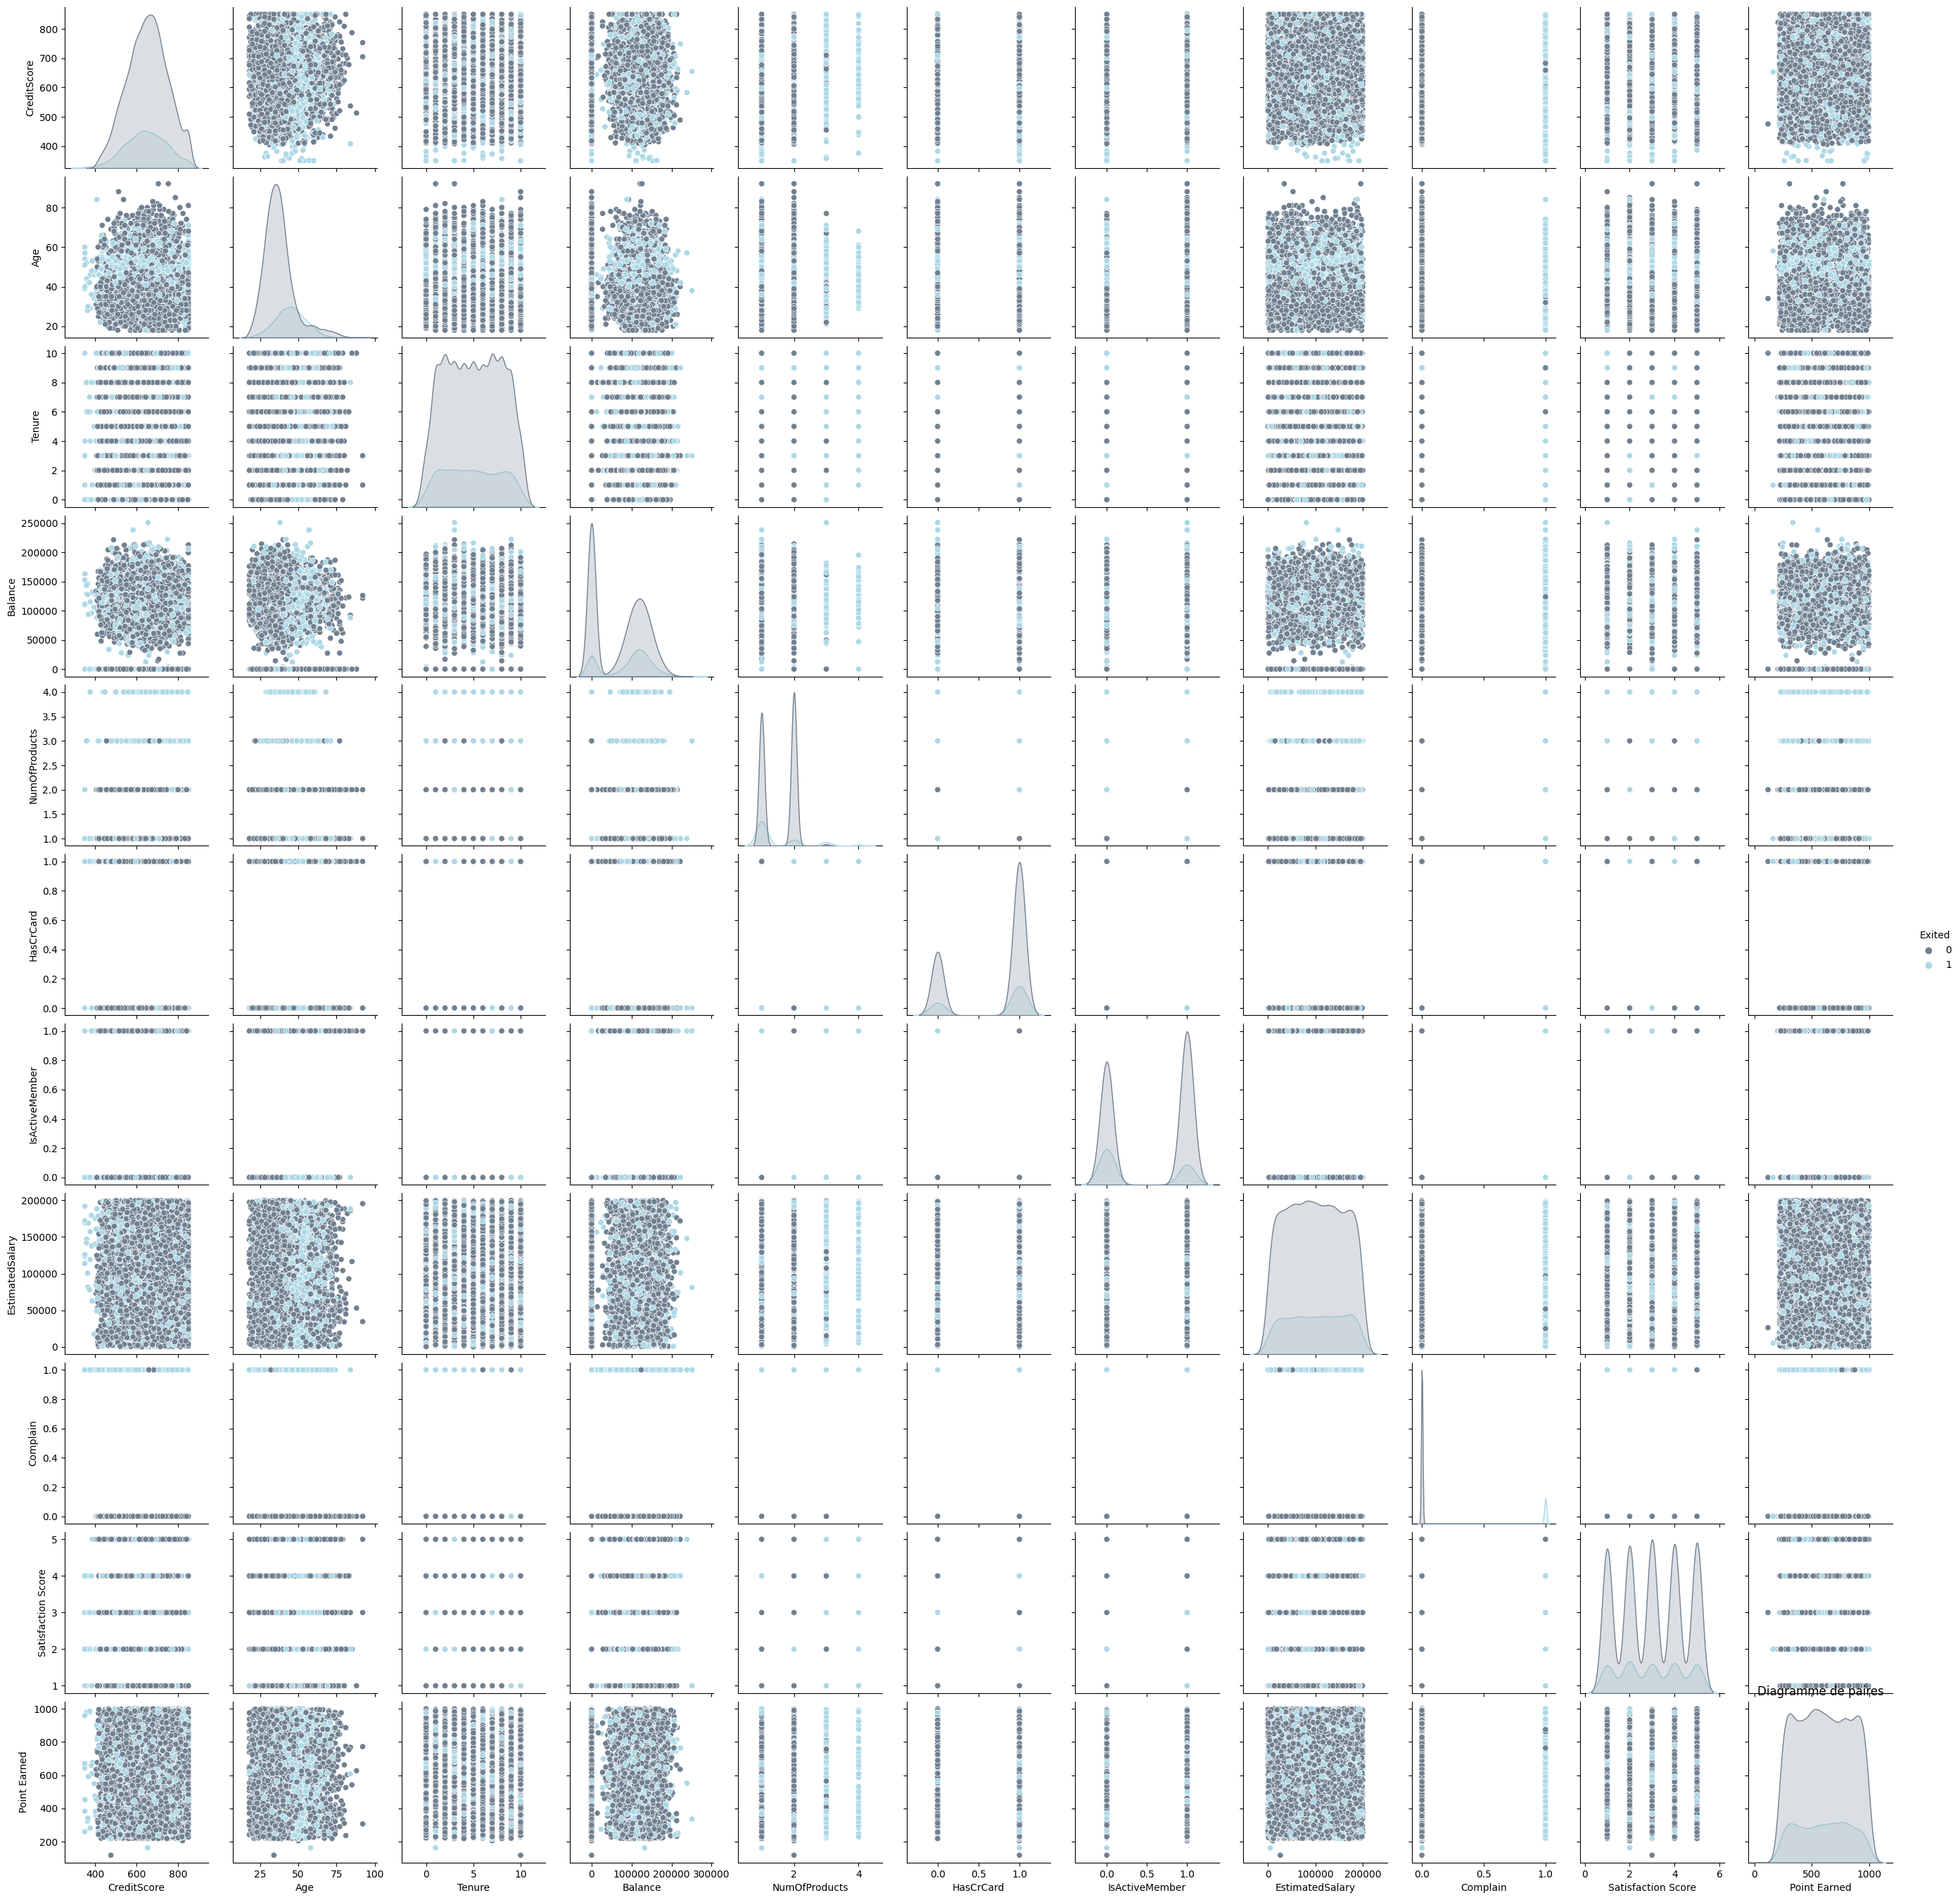

In [7]:
custom_palette = {0:'slategrey',1:'lightblue'}

sns.pairplot(customer_df, diag_kind="kde", markers='o', hue='Exited', palette=custom_palette)
plt.title('Diagramme de paires')
plt.show()

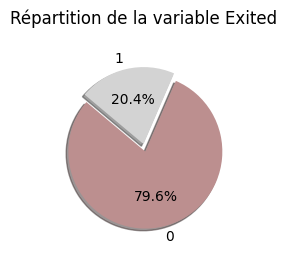

In [8]:
#Données déséquilibrés

exit_counts = customer_df['Exited'].value_counts()
percentages = (exit_counts / exit_counts.sum()) * 100

labels = ['0', '1']
colors = ['rosybrown', 'lightgray']
explode = (0.1, 0) 

plt.figure(figsize=(3, 2.5))
plt.pie(percentages, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140,labeldistance=1.14)

plt.title('Répartition de la variable Exited', y=1.08)

plt.show()

Visualisation des données numériques

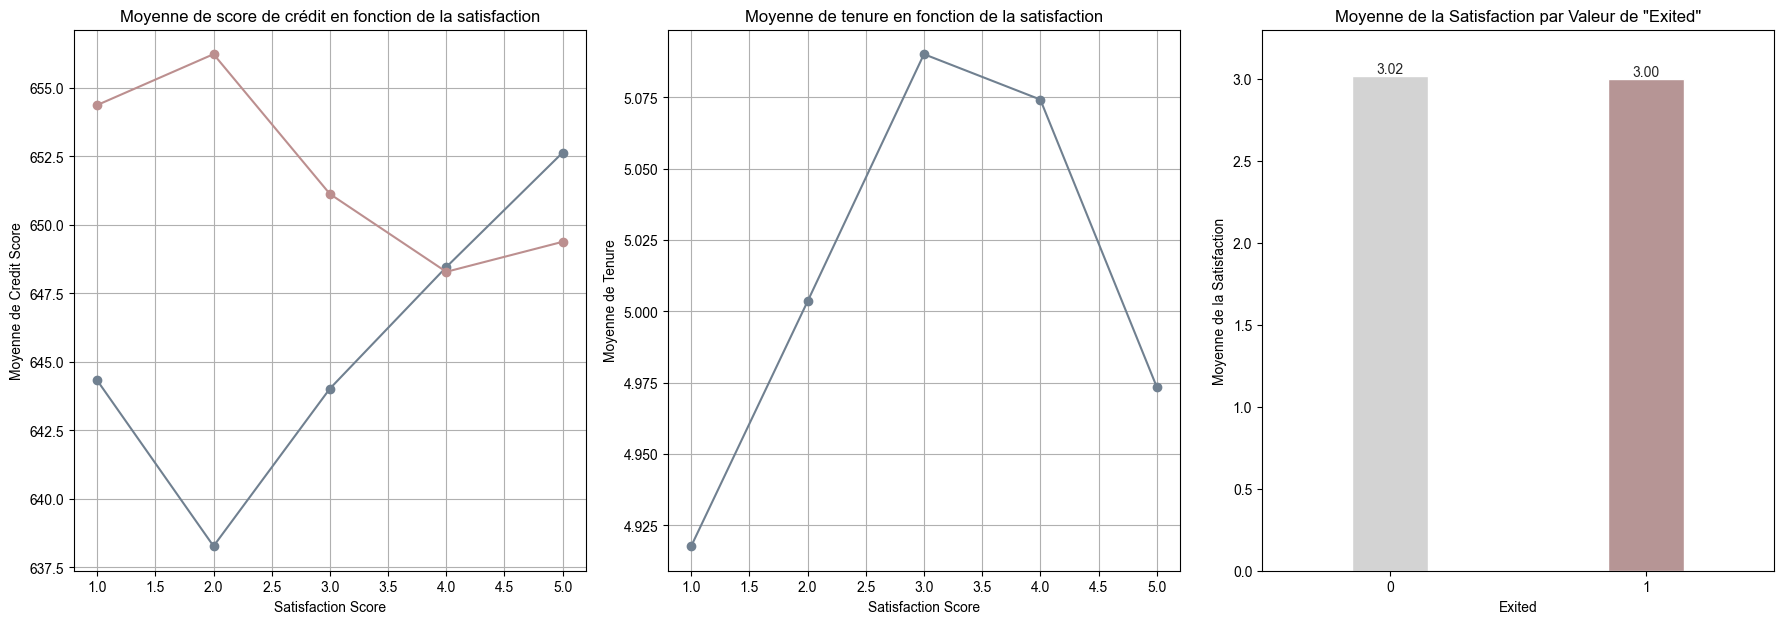

In [9]:
plt.figure(figsize=(18,12))

#Plot 1
plt.subplot(2,3,1)
customer_df_1=customer_df[customer_df['Exited']==1]
credit_by_satisfaction = customer_df_1.groupby('Satisfaction Score')['CreditScore'].mean().reset_index()
plt.plot(credit_by_satisfaction['Satisfaction Score'], credit_by_satisfaction['CreditScore'], marker='o', linestyle='-',color='slategray')
plt.xlabel('Satisfaction Score')
plt.ylabel('Moyenne de Credit Score')
plt.title('Moyenne de score de crédit en Fonction de la satisfaction')
plt.grid(True)

plt.subplot(2,3,1)
customer_df_2=customer_df[customer_df['Exited']==0]
credit_by_satisfaction = customer_df_2.groupby('Satisfaction Score')['CreditScore'].mean().reset_index()
plt.plot(credit_by_satisfaction['Satisfaction Score'], credit_by_satisfaction['CreditScore'], marker='o', linestyle='-',color='rosybrown')
plt.xlabel('Satisfaction Score')
plt.ylabel('Moyenne de Credit Score')
plt.title('Moyenne de score de crédit en fonction de la satisfaction')
plt.grid(True)


#Plot 2
plt.subplot(2,3,2)
tenure_by_satisfaction = customer_df.groupby('Satisfaction Score')['Tenure'].mean().reset_index()
plt.plot(tenure_by_satisfaction['Satisfaction Score'], tenure_by_satisfaction['Tenure'], marker='o', linestyle='-',color='slategray')
plt.xlabel('Satisfaction Score')
plt.ylabel('Moyenne de Tenure')
plt.title('Moyenne de tenure en fonction de la satisfaction')
plt.grid(True)


#Moyenne de la satisfaction par la Balance 
plt.subplot(2,3,3)
mean_satisfaction = customer_df.groupby('Exited')['Satisfaction Score'].mean().reset_index()
sns.set(style="whitegrid")
custom_palette = {'rosybrown', 'lightgray'}
ax=sns.barplot(x='Exited', y='Satisfaction Score', data=mean_satisfaction, width=0.3,palette=custom_palette)
plt.xlabel('Exited')
plt.ylabel('Moyenne de la Satisfaction')
plt.title('Moyenne de la Satisfaction par Valeur de "Exited"')
plt.xticks(ticks=[0, 1], labels=['0', '1'])

for index, row in mean_satisfaction.iterrows():
    ax.text(row['Exited'], row['Satisfaction Score'], f"{row['Satisfaction Score']:.2f}", 
            ha='center', va='bottom', fontsize=10)

plt.ylim(top=3.3)


plt.tight_layout()

plt.show()

In [10]:
customer_df.describe(include=['object'])

Geography Gender Card Type
count      10000  10000     10000
unique         3      2         4
top       France   Male   DIAMOND
freq        5014   5457      2507

In [11]:
df=customer_df.copy()
df.drop(columns=['Exited','Complain'],inplace=True)
df.describe(include=['int','float'])

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  Satisfaction Score  \
count  10000.00000    10000.000000     10000.000000        10000.000000   
mean       0.70550        0.515100    100090.239881            3.013800   
std        0.45584        0.499797     57510.492818            1.405919   
min        0.00000        0.000000        11.580000            1.000000   
25%        0.00000        0.000000     51002.110000            2.000000   
50%        1.00000        1.000000    100193.915000            3.000000   
75%        1.00000        1.000000    149388.247500            4.000000   
max        1.00000        1.000000    199992.480000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

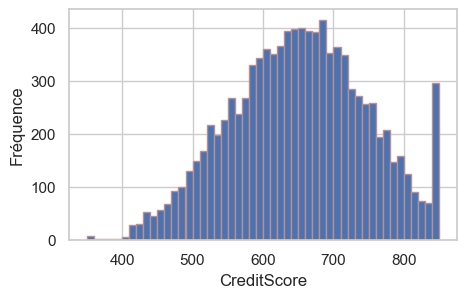

In [12]:
plt.figure(figsize=(5,3))
plt.hist(customer_df['CreditScore'], bins=50, edgecolor='rosybrown') 
plt.xlabel('CreditScore')
plt.ylabel('Fréquence')
plt.show()


<Axes: xlabel='CreditScore', ylabel='Count'>

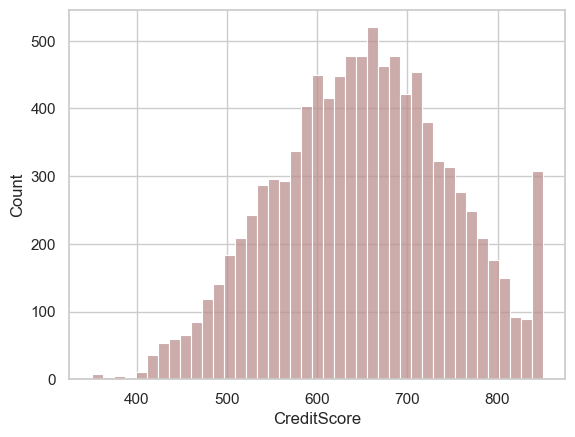

In [13]:
sns.histplot(data=customer_df,x="CreditScore",color='rosybrown')

<Axes: xlabel='Balance', ylabel='Count'>

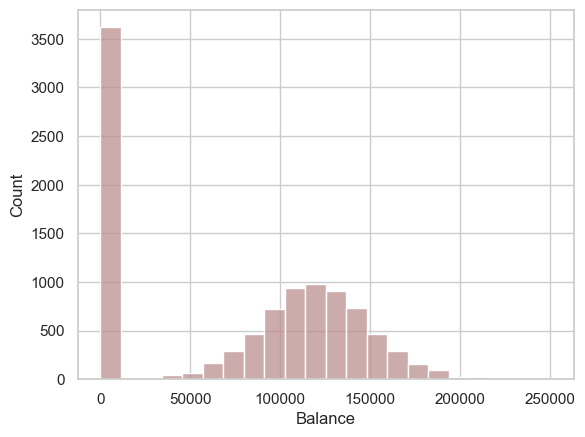

In [14]:
sns.histplot(data=customer_df,x="Balance",color='rosybrown')

Diagramme en violon des données numériques

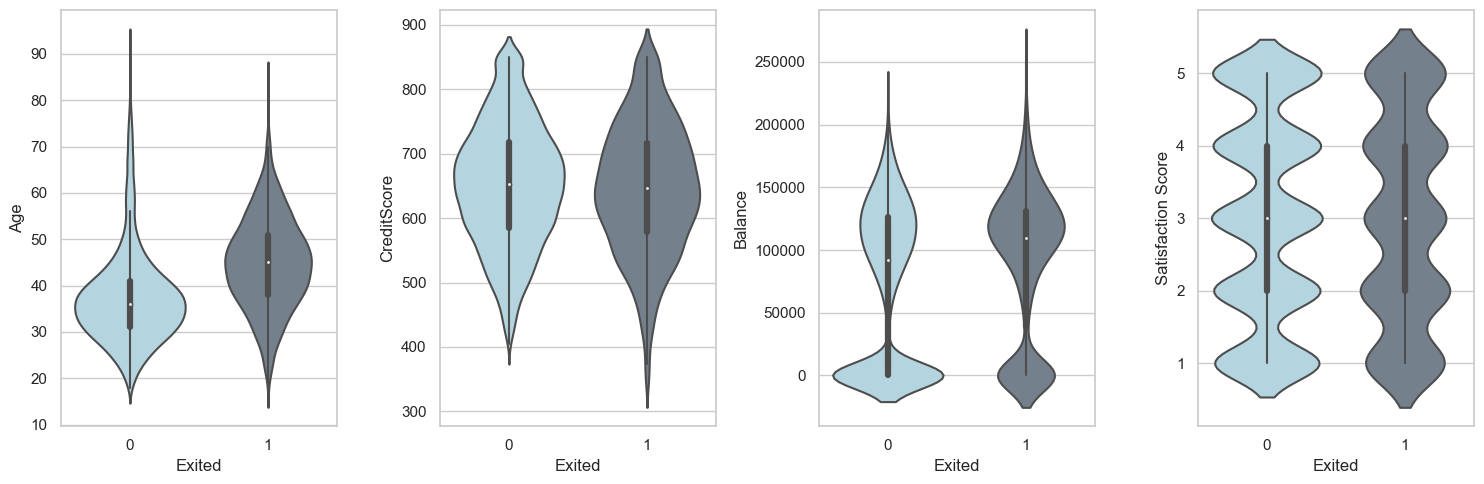

In [15]:
variables_of_interest = ['Age', 'CreditScore', 'Balance','Satisfaction Score']

fig, axes = plt.subplots(nrows=1, ncols=len(variables_of_interest), figsize=(15, 5))
palette={'lightblue','slategrey'}

for i, variable in enumerate(variables_of_interest):
    sns.violinplot(x='Exited', y=variable, data=customer_df, ax=axes[i], palette=palette)
    axes[i].set_xlabel('Exited')
    axes[i].set_ylabel(variable)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['0', '1'])

plt.tight_layout()

plt.show()


Taux de résiliation par nombre de produits

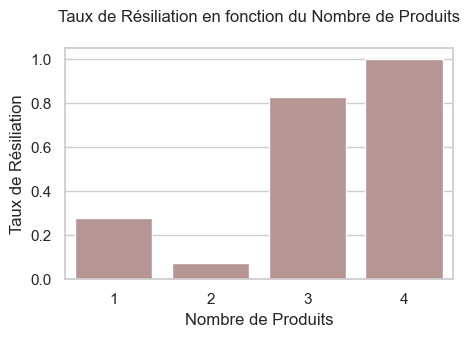

In [16]:
pivot_table = pd.pivot_table(customer_df, values='Exited', index='NumOfProducts', aggfunc='mean')

pivot_table = pivot_table.rename(columns={'Exited': 'Taux de Résiliation'})

color='rosybrown'
plt.figure(figsize=(5, 3))
sns.barplot(data=pivot_table, x=pivot_table.index, y='Taux de Résiliation', color=color)
plt.xlabel('Nombre de Produits')
plt.ylabel('Taux de Résiliation')
plt.title('Taux de Résiliation en fonction du Nombre de Produits',y=1.08)
plt.show()


Visualisation des données catégorielles

In [17]:
def is_categorical(array_like):
    return array_like.dtype.name=='object'

for col in customer_df.columns:
    if is_categorical(customer_df[col]):
        print(col,":\n")
        print(customer_df[col].value_counts())
        print("\n")

Geography :

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Gender :

Male      5457
Female    4543
Name: Gender, dtype: int64


Card Type :

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64




Gender

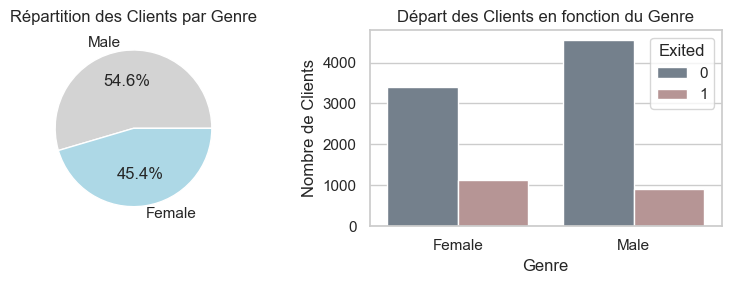

In [18]:
plt.figure(figsize=(8, 3))

# Plot 1
plt.subplot(1, 2, 1)
gender_counts = customer_df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightgray', 'lightblue'])
plt.title('Répartition des Clients par Genre')

# Plot 2
plt.subplot(1,2, 2)
palette_3={'slategrey','rosybrown'}
sns.countplot(data=customer_df, x='Gender', hue='Exited', palette=palette_3)
plt.xlabel('Genre')
plt.ylabel('Nombre de Clients')
plt.title('Départ des Clients en fonction du Genre')
plt.legend(title='Exited', labels=['0', '1'])

plt.tight_layout()

plt.show()

Geography

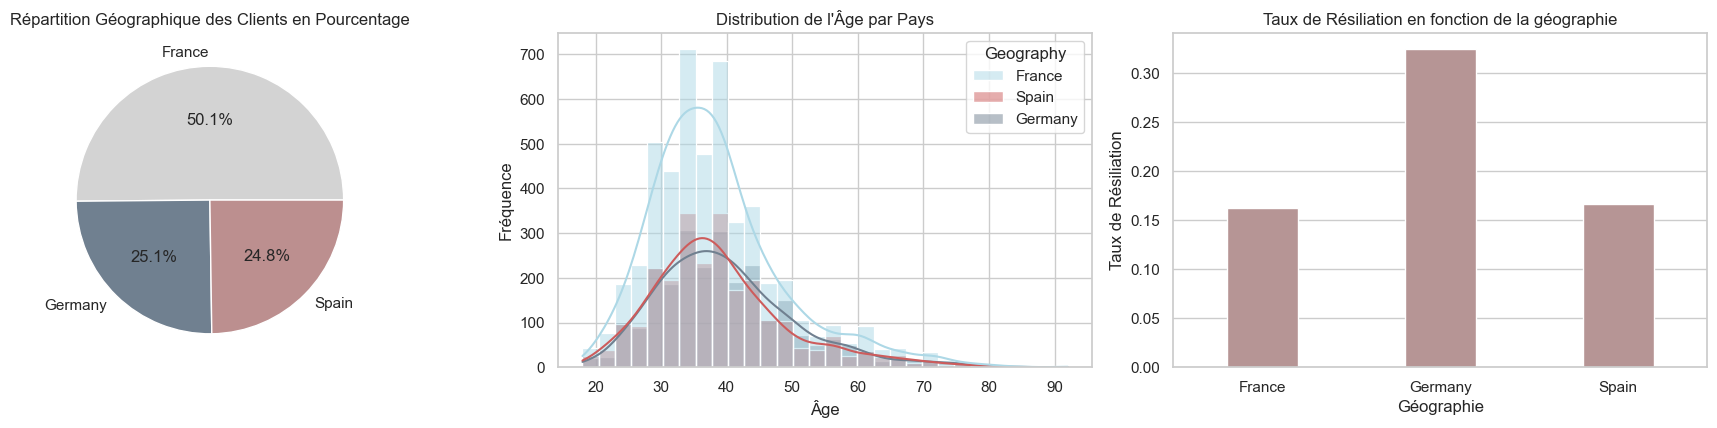

In [19]:
plt.figure(figsize=(18, 12))

# Plot 1 
plt.subplot(3, 3, 1)
geography_counts = customer_df['Geography'].value_counts()
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', colors=['lightgrey', 'slategray', 'rosybrown'])
plt.title('Répartition Géographique des Clients en Pourcentage')

# Plot 2
plt.subplot(3,3,2)
palette={'Germany':'slategrey','France':'lightblue','Spain':'indianred'}
sns.histplot(data=customer_df, x='Age', hue='Geography', bins=30, palette=palette, kde=True)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution de l\'Âge par Pays')

#Plot 3
pivot_table = pd.pivot_table(customer_df, values='Exited', index='Geography', aggfunc='mean')
pivot_table = pivot_table.rename(columns={'Exited': 'Taux de Résiliation'})
color='rosybrown'
plt.subplot(3, 3, 3)
sns.barplot(data=pivot_table, x=pivot_table.index, y='Taux de Résiliation', color=color,width=0.4)
plt.xlabel('Géographie')
plt.ylabel('Taux de Résiliation')
plt.title('Taux de Résiliation en fonction de la géographie')

plt.tight_layout()

plt.show()

Discrétisation (Prétraitement des données)

In [20]:
#AgeCategory
age_categories = ['18-30', '31-40', '41-50', '51-60', '61+']
customer_df['AgeCategory']= pd.cut(customer_df['Age'], bins=[18, 30, 40, 50, 60, float('inf')], 
                                   labels=age_categories, include_lowest=True)

#CreditScore
cut_points = [0, 400, 500, 600, 700, float('inf')] 
labels = ['Très Faible', 'Faible', 'Moyen', 'Élevé', 'Très Élevé']
customer_df['CreditScoreCategory'] = pd.cut(customer_df['CreditScore'], bins=cut_points, labels=labels,include_lowest=True)

In [21]:
customer_df_1=customer_df[customer_df['Exited']==1]
customer_df_2=customer_df[customer_df['Exited']==0]

Distribution des clients par catégorie d'âge et pays

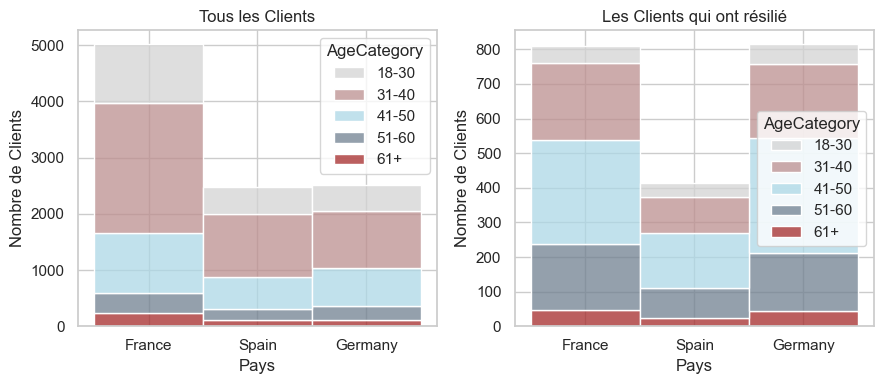

In [22]:
plt.figure(figsize=(9, 4))

palette={'rosybrown','lightblue','lightgrey','slategrey','brown'}

#Plot 1
plt.subplot(1, 2, 1)
sns.histplot(customer_df, x='Geography', hue='AgeCategory', multiple='stack', palette=palette)
plt.xlabel('Pays')
plt.ylabel('Nombre de Clients')
plt.title('Tous les Clients')

#Plot 2 
plt.subplot(1,2,2)
exited_customers = customer_df[customer_df['Exited'] == 1]
sns.histplot(data=exited_customers, x='Geography', hue='AgeCategory', multiple='stack', palette=palette)
plt.xlabel('Pays')
plt.ylabel('Nombre de Clients')
plt.title('Les Clients qui ont résilié')

plt.tight_layout()
plt.show()

In [23]:
# Filtrer les données pour chaque pays
france_data = customer_df[(customer_df['Geography'] == 'France') & (customer_df['Exited']==1)]
germany_data = customer_df[(customer_df['Geography'] == 'Germany') & (customer_df['Exited']==1)]
spain_data = customer_df[(customer_df['Geography'] == 'Spain') & (customer_df['Exited']==1)]

age_category = '41-50'

percentage_france = (len(france_data[france_data['AgeCategory'] == age_category]) / len(france_data)) * 100
percentage_germany = (len(germany_data[germany_data['AgeCategory'] == age_category]) / len(germany_data)) * 100
percentage_spain = (len(spain_data[spain_data['AgeCategory'] == age_category]) / len(spain_data)) * 100

print(f"Pourcentage de personnes de la catégorie d'âge '41-50' en France : {percentage_france:.2f}%")
print(f"Pourcentage de personnes de la catégorie d'âge '41-50' en Allemagne : {percentage_germany:.2f}%")
print(f"Pourcentage de personnes de la catégorie d'âge '41-50' en Espagne : {percentage_spain:.2f}%")

Pourcentage de personnes de la catégorie d'âge '41-50' en France : 36.99%
Pourcentage de personnes de la catégorie d'âge '41-50' en Allemagne : 40.66%
Pourcentage de personnes de la catégorie d'âge '41-50' en Espagne : 38.01%


Card Type

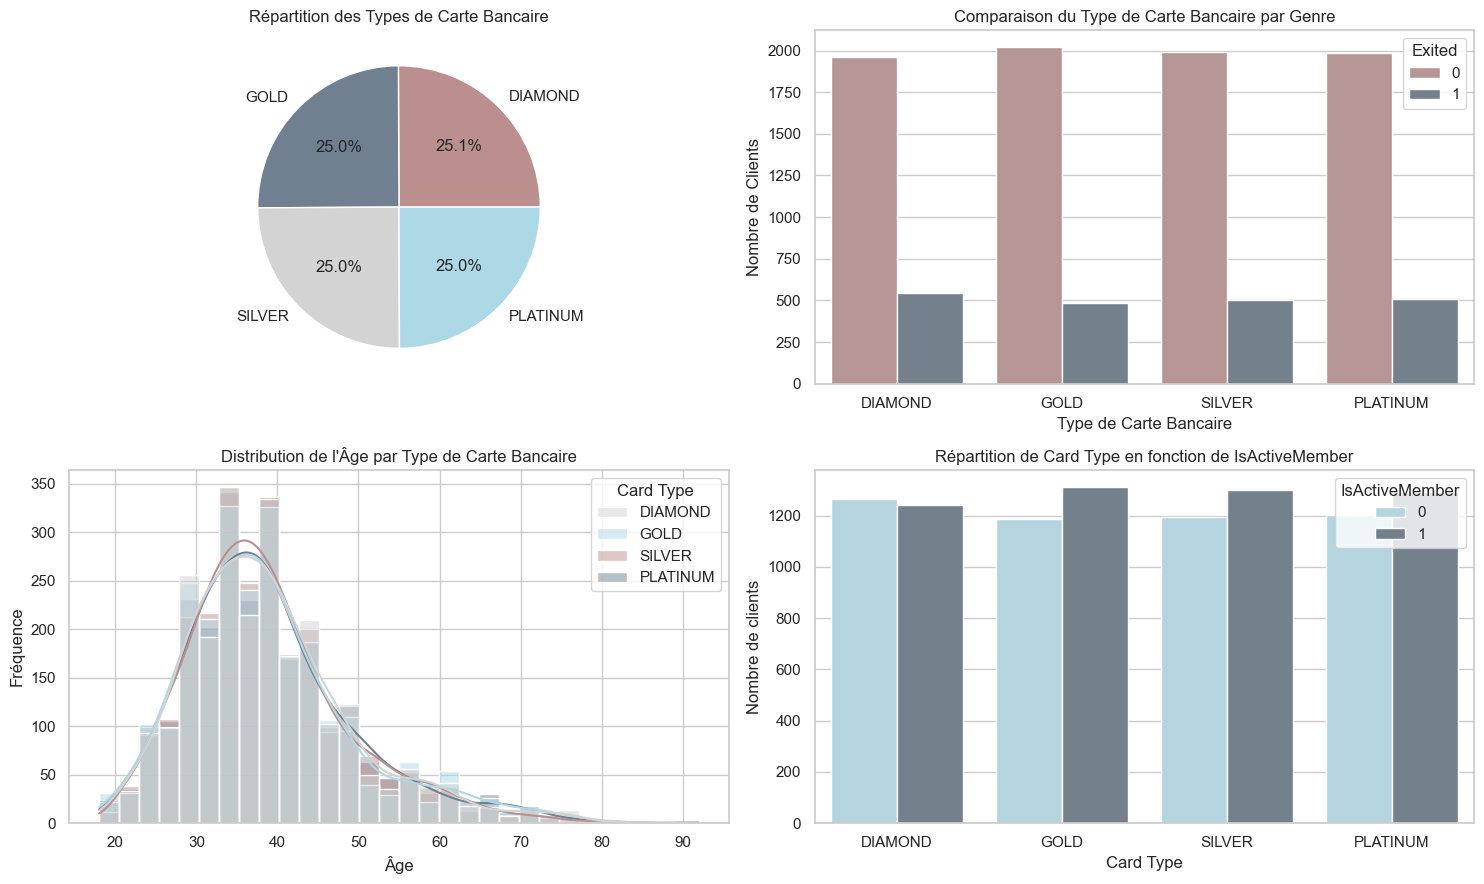

In [24]:
plt.figure(figsize=(15, 9))

# Plot 1
palette=['rosybrown','slategrey','lightgrey','lightblue']
plt.subplot(2, 2, 1)
card_type_counts = customer_df['Card Type'].value_counts()
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%',colors=palette)
plt.title('Répartition des Types de Carte Bancaire')

# Plot 2
plt.subplot(2, 2, 2)
palette_1={0:'rosybrown',1:'slategrey'}
sns.countplot(data=customer_df, x='Card Type', hue='Exited',palette=palette_1)
plt.xlabel('Type de Carte Bancaire')
plt.ylabel('Nombre de Clients')
plt.title('Comparaison du Type de Carte Bancaire par Genre')
plt.legend(title='Exited')

# Plot 3
plt.subplot(2,2, 3)
palette_4={'DIAMOND':'lightgrey','GOLD':'lightblue','SILVER':'rosybrown','PLATINUM':'slategray'}
sns.histplot(data=customer_df, x='Age', hue='Card Type', bins=30, palette=palette_4, kde=True)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution de l\'Âge par Type de Carte Bancaire')


# Plot 4
plt.subplot(2,2,4)
palette_3={'lightblue','slategrey'}
sns.countplot(x='Card Type', hue='IsActiveMember', data=customer_df,palette=palette_3)
plt.xlabel('Card Type')
plt.ylabel('Nombre de clients')
plt.title('Répartition de Card Type en fonction de IsActiveMember')
plt.legend(title='IsActiveMember')

plt.tight_layout()

plt.show()

IsActiveMember

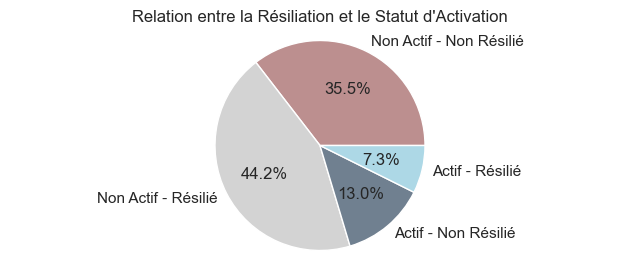

In [25]:
plt.figure(figsize=(8,3))
pie_data = customer_df.groupby(['Exited', 'IsActiveMember']).size().unstack(fill_value=0)
labels = ['Non Actif - Non Résilié', 'Non Actif - Résilié', 'Actif - Non Résilié', 'Actif - Résilié']
colors = ['rosybrown', 'lightgray', 'slategray', 'lightblue']
plt.pie(pie_data.values.flatten(), labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Relation entre la Résiliation et le Statut d\'Activation')
plt.axis('equal')

plt.show()

Taux de résiliation par statut d'activation 

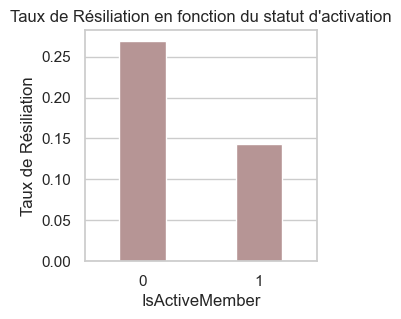

In [26]:
plt.figure(figsize=(3,3))
pivot_table = pd.pivot_table(customer_df, values='Exited', index='IsActiveMember', aggfunc='mean')
pivot_table = pivot_table.rename(columns={'Exited': 'Taux de Résiliation'})
color='rosybrown'
sns.barplot(data=pivot_table, x=pivot_table.index, y='Taux de Résiliation', color=color,width=0.4)
plt.xlabel('IsActiveMember')
plt.ylabel('Taux de Résiliation')
plt.title('Taux de Résiliation en fonction du statut d\'activation')
plt.show()

HasCrCard

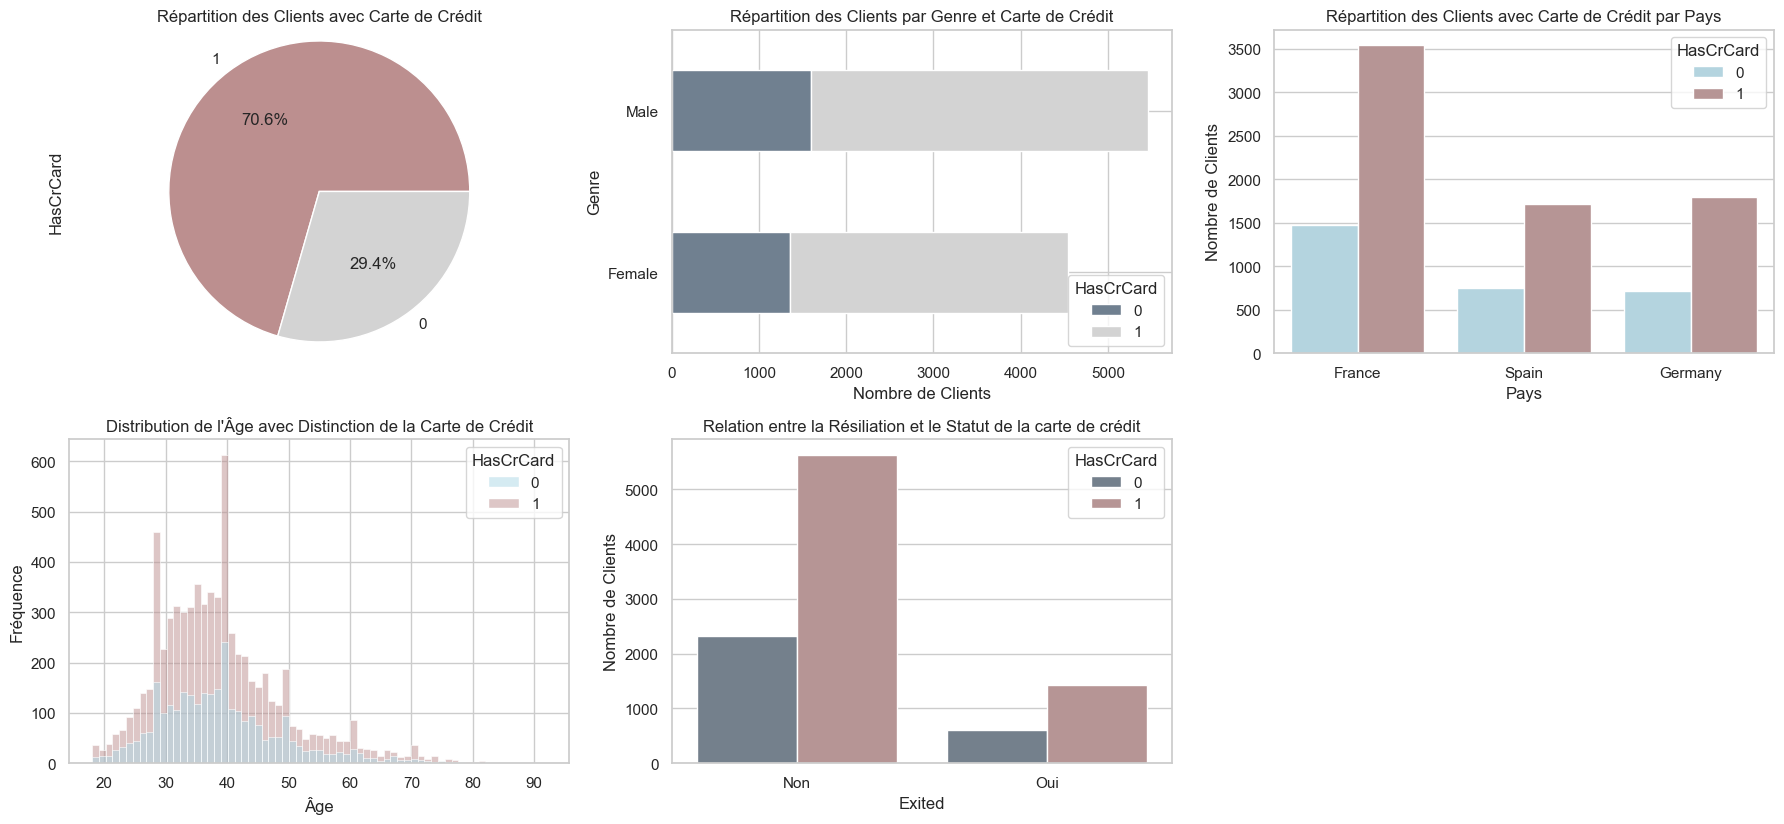

In [27]:
plt.figure(figsize=(18, 12))

# Plot 1
plt.subplot(3, 3, 1)
customer_df['HasCrCard'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['rosybrown', 'lightgray'])
plt.title('Répartition des Clients avec Carte de Crédit')
plt.axis('equal')

palette={'lightgrey','slategrey'}

# Plot 2
plt.subplot(3, 3, 2)
stacked_data = customer_df.groupby(['Gender', 'HasCrCard']).size().unstack(fill_value=0)
stacked_data.plot(kind='barh', stacked=True, color=['slategrey', 'lightgrey'], ax=plt.gca())
plt.xlabel('Nombre de Clients')
plt.ylabel('Genre')
plt.title('Répartition des Clients par Genre et Carte de Crédit')
plt.legend(title='HasCrCard', loc='lower right')

# Plot 3
plt.subplot(3, 3, 3)
sns.countplot(data=customer_df, x='Geography', hue='HasCrCard',palette={'rosybrown','lightblue'})
plt.xlabel('Pays')
plt.ylabel('Nombre de Clients')
plt.title('Répartition des Clients avec Carte de Crédit par Pays')
plt.legend(title='HasCrCard')

# Plot 4
plt.subplot(3, 3, 4)
palette_1={'rosybrown','lightblue'}
sns.histplot(data=customer_df, x='Age', hue='HasCrCard', palette=palette_1)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution de l\'Âge avec Distinction de la Carte de Crédit')

#Plot 5
plt.subplot(3,3,5)
sns.countplot(data=customer_df, x='Exited', hue='HasCrCard', palette={'rosybrown','slategray'})
plt.xlabel('Exited')
plt.ylabel('Nombre de Clients')
plt.title('Relation entre la Résiliation et le Statut de la carte de crédit')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.legend(title='HasCrCard')

plt.tight_layout()

plt.show()

Influence d'âge de catégorie sur la résiliation

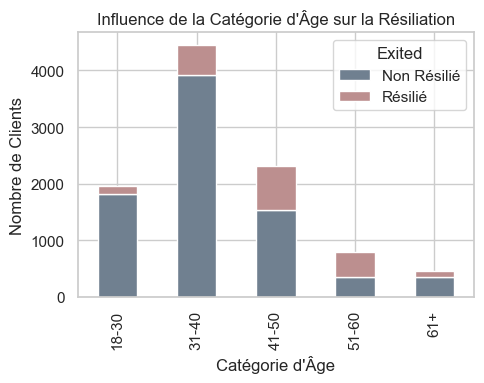

In [28]:
plt.figure(figsize=(5, 4))

stacked_data = customer_df.groupby(['AgeCategory', 'Exited']).size().unstack(fill_value=0)

stacked_data.plot(kind='bar', stacked=True, color=['slategrey', 'rosybrown'], ax=plt.gca())
plt.xlabel('Catégorie d\'Âge')
plt.ylabel('Nombre de Clients')
plt.title('Influence de la Catégorie d\'Âge sur la Résiliation')
plt.legend(title='Exited', labels=['Non Résilié', 'Résilié'], loc='upper right')

plt.tight_layout()
plt.show()


Taux de résiliation par catégorie d'âge

In [29]:
customer_df_copied=customer_df.copy()
customer_df_copied['Exited_Binary'] = customer_df_copied['Exited'].map({0: 'Non Résilié', 1: 'Résilié'})

# Calculez le taux de résiliation pour chaque catégorie d'âge
resiliation_rate_by_age = customer_df_copied.groupby(['AgeCategory', 'Exited_Binary']).size().unstack(fill_value=0)
resiliation_rate_by_age['Taux de Résiliation (%)'] = (resiliation_rate_by_age['Résilié'] / (resiliation_rate_by_age['Résilié'] + resiliation_rate_by_age['Non Résilié'])) * 100

# Réinitialisez l'index pour avoir une colonne 'Age_Category'
resiliation_rate_by_age = resiliation_rate_by_age.reset_index()

# Affichez le DataFrame résultant
print(resiliation_rate_by_age)

Exited_Binary AgeCategory  Non Résilié  Résilié  Taux de Résiliation (%)
0                   18-30         1820      148                 7.520325
1                   31-40         3912      539                12.109638
2                   41-50         1532      788                33.965517
3                   51-60          349      448                56.210790
4                     61+          349      115                24.784483


In [30]:
customer_df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             0               1        112542.58       0         1   
2             1               0        113931.57       1         1   
3             0               0         93826.63       0         0   
4             1               1         79084.10       0         0   
...         ...             ...              ...     ...       ...   
9995          1               0         96270.64       0         0   
9996          1               1        101699.77       0         0   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   
9999          1               0         38190.78       0         0   

      Satisfaction Score Card Type  Point Earned AgeCategory  \
0                      2   DIAMOND           464       41-50   
1                      3   DIAMOND           456       41-50   
2                      3   DIAMOND           377       41-50   
3                      5      GOLD           350       31-40   
4                      5      GOLD           425       41-50   
...                  ...       ...           ...         ...   
9995                   1   DIAMOND           300       31-40   
9996                   5  PLATINUM           771       31-40   
9997                   3    SILVER           564       31-40   
9998                   2      GOLD           339       41-50   
9999                   3   DIAMOND           911       18-30   

     CreditScoreCategory  
0                  Élevé  
1                  Élevé  
2                  Moyen  
3                  Élevé  
4             Très Élevé  
...                  ...  
9995          Très Élevé  
9996               Moyen  
9997          Très Élevé  
9998          Très Élevé  
9999          Très Élevé  

[10000 rows x 17 columns]

Taux de satisfaction par satisfaction score

In [31]:
pivot_table = pd.pivot_table(customer_df, values='Exited', index='Satisfaction Score', aggfunc=['count', 'mean'])

pivot_table.columns = ['Nombre de Clients', 'Taux de Résiliation']

print(pivot_table)

                    Nombre de Clients  Taux de Résiliation
Satisfaction Score                                        
1                                1932             0.200311
2                                2014             0.217974
3                                2042             0.196376
4                                2008             0.206175
5                                2004             0.198104


Taux de résiliation par tenure

In [32]:
pivot_table = pd.pivot_table(customer_df, values='Exited', index='Tenure', aggfunc=['count', 'mean'])

pivot_table.columns = ['Nombre de Clients', 'Taux de Résiliation']

print(pivot_table)

        Nombre de Clients  Taux de Résiliation
Tenure                                        
0                     413             0.230024
1                    1035             0.224155
2                    1048             0.191794
3                    1009             0.211100
4                     989             0.205258
5                    1012             0.206522
6                     967             0.202689
7                    1028             0.172179
8                    1025             0.192195
9                     984             0.217480
10                    490             0.206122


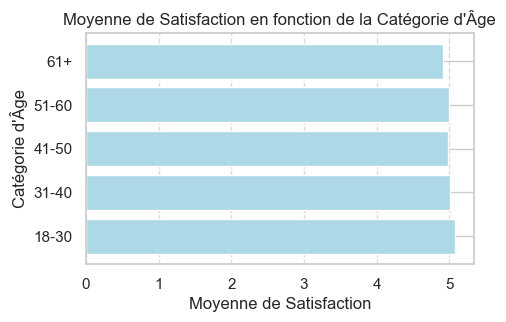

In [33]:
plt.figure(figsize=(5, 3))
category_by_satisfaction = customer_df.groupby('AgeCategory')['Tenure'].mean().reset_index()

plt.barh(category_by_satisfaction['AgeCategory'], category_by_satisfaction['Tenure'], color='lightblue')
plt.ylabel('Catégorie d\'Âge')
plt.xlabel('Moyenne de Satisfaction')
plt.title('Moyenne de Satisfaction en fonction de la Catégorie d\'Âge')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Exploration par groupe d'âge

In [34]:
customer_df_2

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1             608     Spain  Female   41       1   83807.86              1   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
6             822    France    Male   50       7       0.00              2   
8             501    France    Male   44       4  142051.07              2   
...           ...       ...     ...  ...     ...        ...            ...   
9993          644    France    Male   28       7  155060.41              1   
9994          800    France  Female   29       2       0.00              2   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
1             0               1        112542.58       0         1   
3             0               0         93826.63       0         0   
4             1               1         79084.10       0         0   
6             1               1         10062.80       0         0   
8             0               1         74940.50       0         0   
...         ...             ...              ...     ...       ...   
9993          1               0         29179.52       0         0   
9994          0               0        167773.55       0         0   
9995          1               0         96270.64       0         0   
9996          1               1        101699.77       0         0   
9999          1               0         38190.78       0         0   

      Satisfaction Score Card Type  Point Earned AgeCategory  \
1                      3   DIAMOND           456       41-50   
3                      5      GOLD           350       31-40   
4                      5      GOLD           425       41-50   
6                      2    SILVER           206       41-50   
8                      3      GOLD           251       41-50   
...                  ...       ...           ...         ...   
9993                   5   DIAMOND           715       18-30   
9994                   4  PLATINUM           311       18-30   
9995                   1   DIAMOND           300       31-40   
9996                   5  PLATINUM           771       31-40   
9999                   3   DIAMOND           911       18-30   

     CreditScoreCategory  
1                  Élevé  
3                  Élevé  
4             Très Élevé  
6             Très Élevé  
8                  Moyen  
...                  ...  
9993               Élevé  
9994          Très Élevé  
9995          Très Élevé  
9996               Moyen  
9999          Très Élevé  

[7962 rows x 17 columns]

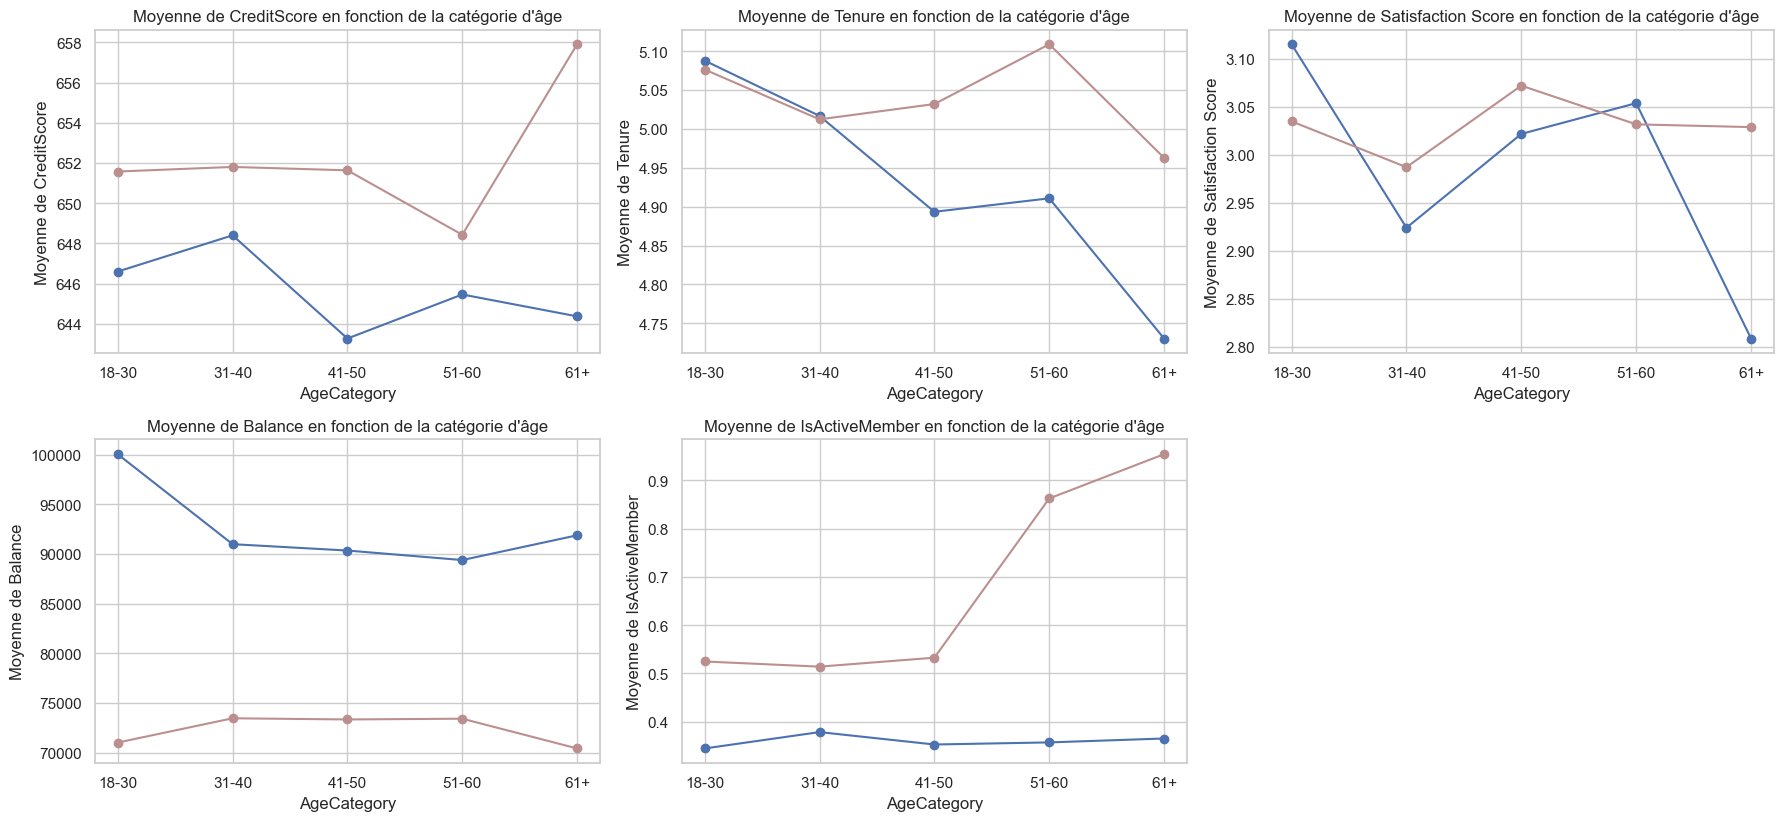

In [35]:
variables_of_interest = ['CreditScore', 'Tenure','Satisfaction Score','Balance','IsActiveMember']

plt.figure(figsize=(18, 12))

for i, variable in enumerate(variables_of_interest):
    plt.subplot(3,3,i+1)
    x_by_satisfaction = customer_df_1.groupby('AgeCategory')[variables_of_interest[i]].mean().reset_index()
    plt.plot(x_by_satisfaction['AgeCategory'], x_by_satisfaction[variables_of_interest[i]], marker='o', linestyle='-')
    plt.xlabel('AgeCategory')
    plt.ylabel('Moyenne de  '+variables_of_interest[i])
    plt.title('Moyenne de '+variables_of_interest[i]+' en fonction de la catégorie d\'âge')
    plt.grid(True)
    
    plt.subplot(3,3,i+1)
    x_by_satisfaction = customer_df_2.groupby('AgeCategory')[variables_of_interest[i]].mean().reset_index()
    plt.plot(x_by_satisfaction['AgeCategory'], x_by_satisfaction[variables_of_interest[i]], marker='o', linestyle='-',color='rosybrown')
    plt.xlabel('AgeCategory')
    plt.ylabel('Moyenne de '+ variables_of_interest[i])
    plt.grid(True)

plt.tight_layout()

plt.show()

In [36]:
customer_df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             0               1        112542.58       0         1   
2             1               0        113931.57       1         1   
3             0               0         93826.63       0         0   
4             1               1         79084.10       0         0   
...         ...             ...              ...     ...       ...   
9995          1               0         96270.64       0         0   
9996          1               1        101699.77       0         0   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   
9999          1               0         38190.78       0         0   

      Satisfaction Score Card Type  Point Earned AgeCategory  \
0                      2   DIAMOND           464       41-50   
1                      3   DIAMOND           456       41-50   
2                      3   DIAMOND           377       41-50   
3                      5      GOLD           350       31-40   
4                      5      GOLD           425       41-50   
...                  ...       ...           ...         ...   
9995                   1   DIAMOND           300       31-40   
9996                   5  PLATINUM           771       31-40   
9997                   3    SILVER           564       31-40   
9998                   2      GOLD           339       41-50   
9999                   3   DIAMOND           911       18-30   

     CreditScoreCategory  
0                  Élevé  
1                  Élevé  
2                  Moyen  
3                  Élevé  
4             Très Élevé  
...                  ...  
9995          Très Élevé  
9996               Moyen  
9997          Très Élevé  
9998          Très Élevé  
9999          Très Élevé  

[10000 rows x 17 columns]

Pourcentage des Card Type

In [37]:
n=0
L=['DIAMOND','GOLD','PLATINUM','SILVER']
customer_df_1=customer_df[customer_df['Exited']==1]
resiliation_rate_by_age = customer_df_1.groupby(['AgeCategory', 'Card Type']).size().unstack(fill_value=0)

for col in L:
    n+=resiliation_rate_by_age[col]
for col in L:
    resiliation_rate_by_age['Pourcentage de '+col]=(resiliation_rate_by_age[col]/n)*100

resiliation_rate_by_age = resiliation_rate_by_age.reset_index()

print(resiliation_rate_by_age)

Card Type AgeCategory  DIAMOND  GOLD  PLATINUM  SILVER  \
0               18-30       39    33        35      41   
1               31-40      137   126       133     143   
2               41-50      232   193       197     166   
3               51-60      108    97       115     128   
4                 61+       30    33        28      24   

Card Type  Pourcentage de DIAMOND  Pourcentage de GOLD  \
0                       26.351351            22.297297   
1                       25.417440            23.376623   
2                       29.441624            24.492386   
3                       24.107143            21.651786   
4                       26.086957            28.695652   

Card Type  Pourcentage de PLATINUM  Pourcentage de SILVER  
0                        23.648649              27.702703  
1                        24.675325              26.530612  
2                        25.000000              21.065990  
3                        25.669643              28.571429  
4 

Visualisations des pourcentages précedents 

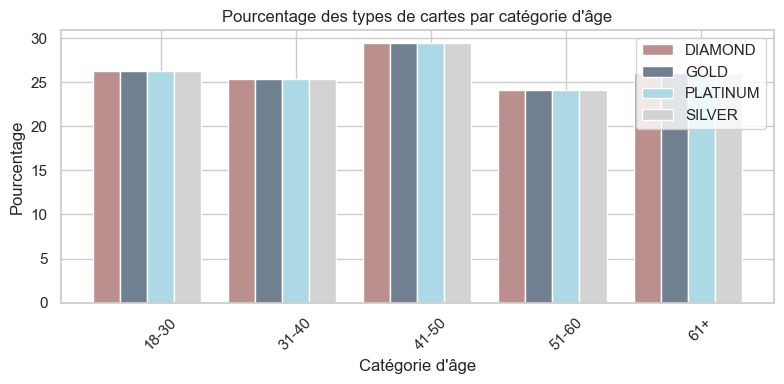

In [38]:
x = np.arange(len(resiliation_rate_by_age['AgeCategory']))
width = 0.2  

palette=['rosybrown','slategrey','lightblue','lightgrey']
fig, ax = plt.subplots(figsize=(8, 4))

for i, col in enumerate(L):
    ax.bar(x + i * width, resiliation_rate_by_age['Pourcentage de DIAMOND' ], width, label=col,color=palette[i])
    
ax.set_xlabel('Catégorie d\'âge')
ax.set_ylabel('Pourcentage')
ax.set_title('Pourcentage des types de cartes par catégorie d\'âge')
ax.set_xticks(x + width * len(L) / 2)
ax.set_xticklabels(resiliation_rate_by_age['AgeCategory'])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Taux de résiliation selon la géographie et la catégorie d'âge

In [39]:
customer_df['Taux de Résiliation'] = customer_df.groupby(['Geography', 'AgeCategory'])['Exited'].transform('mean') * 100

print(customer_df[['Geography', 'AgeCategory', 'Taux de Résiliation']].drop_duplicates())

    Geography AgeCategory  Taux de Résiliation
0      France       41-50            28.116214
1       Spain       41-50            27.304348
3      France       31-40             9.562960
7     Germany       18-30            12.362031
9      France       18-30             4.913295
11      Spain       18-30             8.595388
14      Spain       31-40             9.302326
15    Germany       41-50            48.820059
16    Germany       51-60            69.547325
26    Germany       31-40            20.939335
41     France       51-60            52.588556
42     France         61+            19.913420
44      Spain         61+            20.833333
63      Spain       51-60            45.989305
243   Germany         61+            38.938053


Heatmap (Taux de résiliation selon la catégorie d'âge et la géographie)

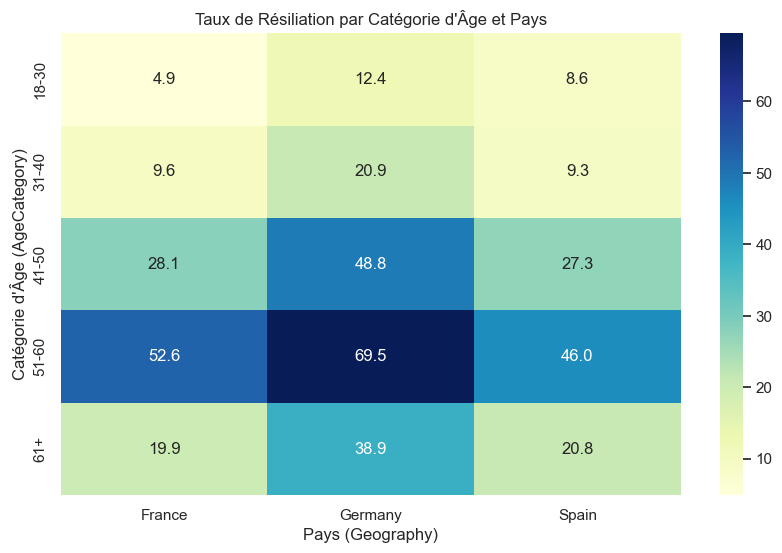

In [40]:
pivot_table = customer_df.pivot_table(values='Taux de Résiliation', index='AgeCategory', columns='Geography')

plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_table, annot=True, cmap='YlGnBu', fmt='.1f', cbar=True)
plt.xlabel('Pays (Geography)')
plt.ylabel('Catégorie d\'Âge (AgeCategory)')
plt.title('Taux de Résiliation par Catégorie d\'Âge et Pays')
plt.show()


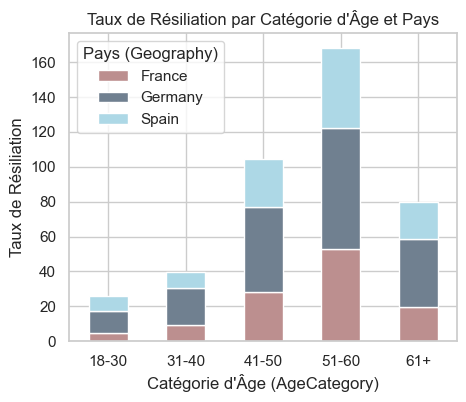

In [41]:
pivot_table = customer_df.pivot_table(values='Taux de Résiliation', index='AgeCategory', columns='Geography')

ax = pivot_table.plot(kind='bar', stacked=True, figsize=(5, 4),color=palette)

plt.xlabel('Catégorie d\'Âge (AgeCategory)')
plt.ylabel('Taux de Résiliation')
plt.title('Taux de Résiliation par Catégorie d\'Âge et Pays')

plt.legend(title='Pays (Geography)')

plt.xticks(range(len(pivot_table.index)), pivot_table.index, rotation=0)

plt.show()

Taux de résiliation par catégorie d'âge (Card Type et Gender)

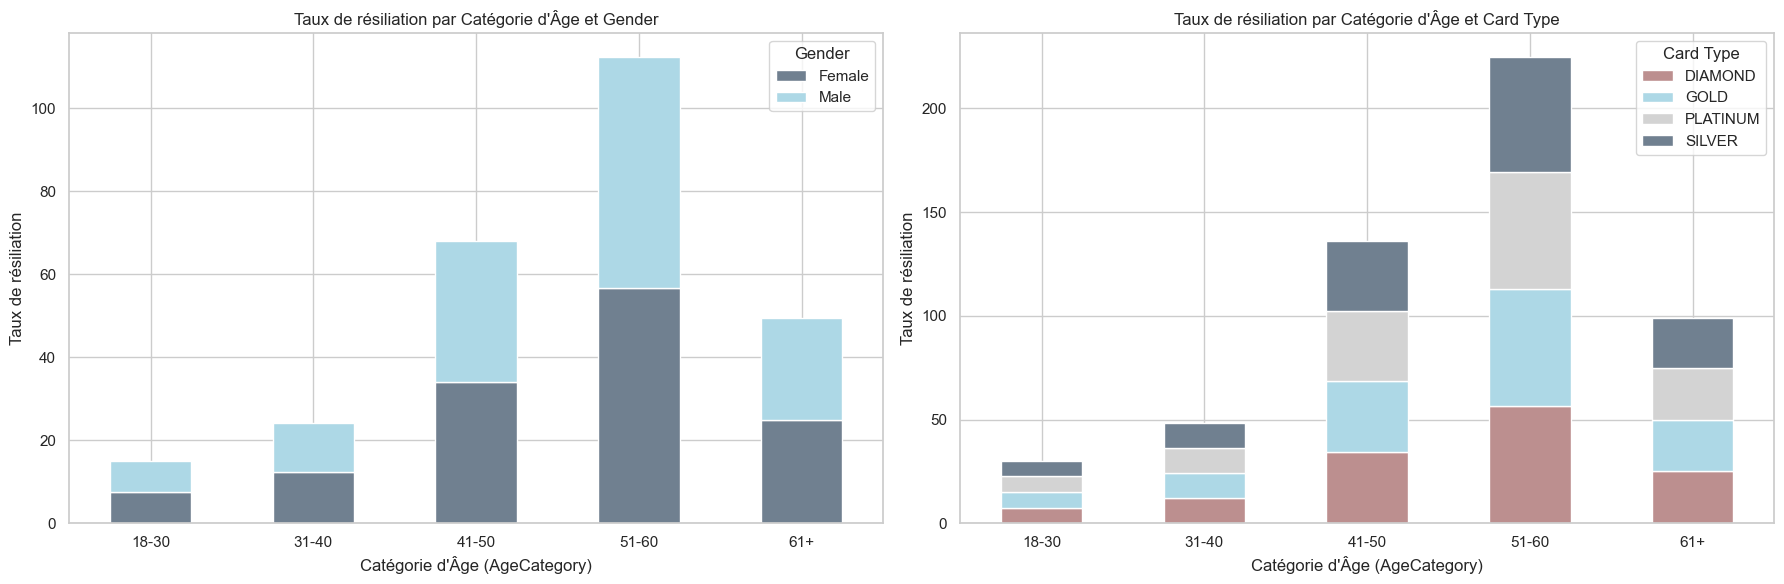

In [42]:
categories = ['Gender', 'Card Type']

fig, axes = plt.subplots(1, len(categories), figsize=(18, 6))
palette=[['slategrey','lightblue'],['rosybrown','lightblue','lightgrey','slategrey']]


for i, category in enumerate(categories):
    pivot_table = customer_df.pivot_table(values='Taux de Résiliation', index='AgeCategory', columns=category)
    ax = pivot_table.plot(kind='bar', stacked=True, ax=axes[i],color=palette[i])
    
    ax.set_xlabel('Catégorie d\'Âge (AgeCategory)')
    ax.set_ylabel('Taux de résiliation')
    ax.set_title(f'Taux de résiliation par Catégorie d\'Âge et {category}')
    ax.legend(title=category)
    ax.set_xticks(range(len(pivot_table.index)))
    ax.set_xticklabels(pivot_table.index, rotation=0)

plt.tight_layout()
plt.show()

In [43]:
customer_df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             0               1        112542.58       0         1   
2             1               0        113931.57       1         1   
3             0               0         93826.63       0         0   
4             1               1         79084.10       0         0   
...         ...             ...              ...     ...       ...   
9995          1               0         96270.64       0         0   
9996          1               1        101699.77       0         0   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   
9999          1               0         38190.78       0         0   

      Satisfaction Score Card Type  Point Earned AgeCategory  \
0                      2   DIAMOND           464       41-50   
1                      3   DIAMOND           456       41-50   
2                      3   DIAMOND           377       41-50   
3                      5      GOLD           350       31-40   
4                      5      GOLD           425       41-50   
...                  ...       ...           ...         ...   
9995                   1   DIAMOND           300       31-40   
9996                   5  PLATINUM           771       31-40   
9997                   3    SILVER           564       31-40   
9998                   2      GOLD           339       41-50   
9999                   3   DIAMOND           911       18-30   

     CreditScoreCategory  Taux de Résiliation  
0                  Élevé            28.116214  
1                  Élevé            27.304348  
2                  Moyen            28.116214  
3                  Élevé             9.562960  
4             Très Élevé            27.304348  
...                  ...                  ...  
9995          Très Élevé             9.562960  
9996               Moyen             9.562960  
9997          Très Élevé             9.562960  
9998          Très Élevé            48.820059  
9999          Très Élevé             4.913295  

[10000 rows x 18 columns]

Corrélation de Pearson

In [44]:
colonnes_a_eliminer = ['Geography', 'Gender', 'Card Type', 'AgeCategory', 'CreditScoreCategory']

customer_num = customer_df.drop(columns=colonnes_a_eliminer)

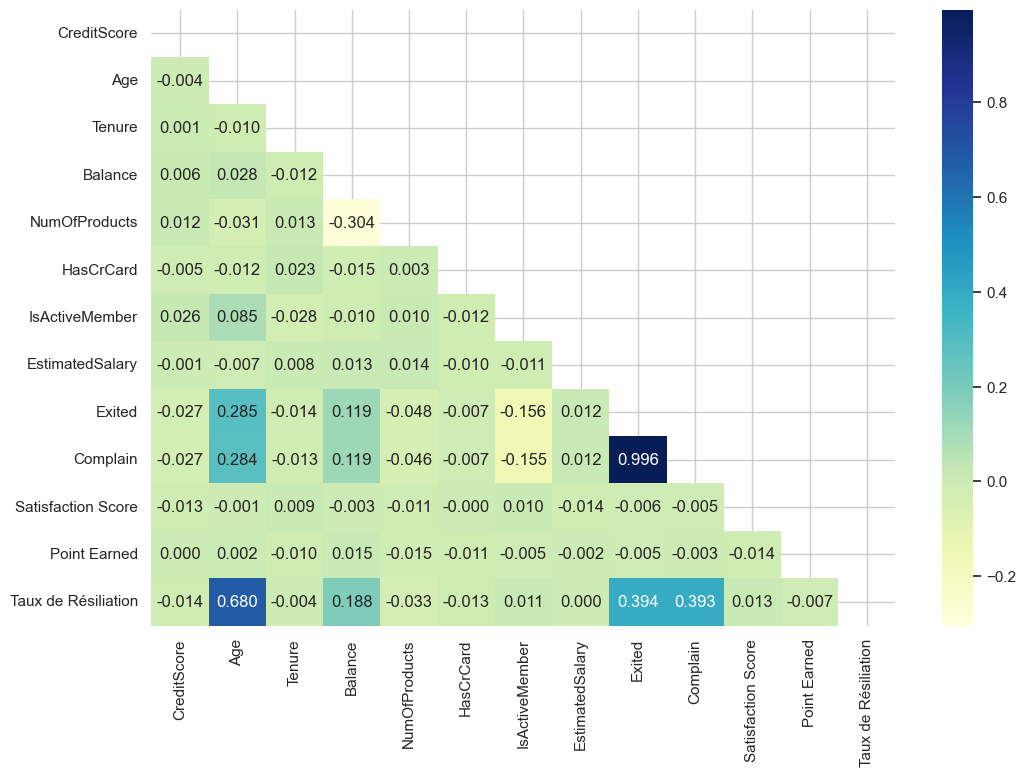

In [45]:
correlation_matrix = customer_num.corr(method='pearson')

plt.figure(figsize=(12, 8))

mask = np.triu(np.ones_like(customer_num.corr(), dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".3f", mask=mask)

#plt.title('Matrice de Corrélation de Pearson')

plt.show()

In [46]:
customer_df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             0               1        112542.58       0         1   
2             1               0        113931.57       1         1   
3             0               0         93826.63       0         0   
4             1               1         79084.10       0         0   
...         ...             ...              ...     ...       ...   
9995          1               0         96270.64       0         0   
9996          1               1        101699.77       0         0   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   
9999          1               0         38190.78       0         0   

      Satisfaction Score Card Type  Point Earned AgeCategory  \
0                      2   DIAMOND           464       41-50   
1                      3   DIAMOND           456       41-50   
2                      3   DIAMOND           377       41-50   
3                      5      GOLD           350       31-40   
4                      5      GOLD           425       41-50   
...                  ...       ...           ...         ...   
9995                   1   DIAMOND           300       31-40   
9996                   5  PLATINUM           771       31-40   
9997                   3    SILVER           564       31-40   
9998                   2      GOLD           339       41-50   
9999                   3   DIAMOND           911       18-30   

     CreditScoreCategory  Taux de Résiliation  
0                  Élevé            28.116214  
1                  Élevé            27.304348  
2                  Moyen            28.116214  
3                  Élevé             9.562960  
4             Très Élevé            27.304348  
...                  ...                  ...  
9995          Très Élevé             9.562960  
9996               Moyen             9.562960  
9997          Très Élevé             9.562960  
9998          Très Élevé            48.820059  
9999          Très Élevé             4.913295  

[10000 rows x 18 columns]

In [47]:
customer_df.drop(columns=["Complain","Taux de Résiliation"],inplace=True)

# Prétraitement des données (Data preprocessing)

Détection des doublons (Pourquoi? Risque de biais sur les statistiques d'imputation)

In [48]:
customer_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [49]:
customer_df.duplicated().sum()

0

Gestion de la cohérence des modalités

In [50]:
# Vérification du nombre de modalités par variable
for key, value in customer_df.items():
    print("{}: {}".format(key, len(customer_df[key].unique())))

CreditScore: 460
Geography: 3
Gender: 2
Age: 70
Tenure: 11
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999
Exited: 2
Satisfaction Score: 5
Card Type: 4
Point Earned: 785
AgeCategory: 5
CreditScoreCategory: 5


In [51]:
customer_df.dtypes

CreditScore               int64
Geography                object
Gender                   object
Age                       int64
Tenure                    int64
Balance                 float64
NumOfProducts             int64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Exited                    int64
Satisfaction Score        int64
Card Type                object
Point Earned              int64
AgeCategory            category
CreditScoreCategory    category
dtype: object

In [52]:
cols=customer_df.select_dtypes(exclude=['int64','float64']).columns
for col in cols:
    print(customer_df[col].value_counts())
    print(' ')
    print(' ')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
 
 
Male      5457
Female    4543
Name: Gender, dtype: int64
 
 
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64
 
 
31-40    4451
41-50    2320
18-30    1968
51-60     797
61+       464
Name: AgeCategory, dtype: int64
 
 
Élevé          3818
Très Élevé     3116
Moyen          2423
Faible          624
Très Faible      19
Name: CreditScoreCategory, dtype: int64
 
 


Gestion des valeurs manquantes

In [53]:
customer_df.isnull().sum()

CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Satisfaction Score     0
Card Type              0
Point Earned           0
AgeCategory            0
CreditScoreCategory    0
dtype: int64

In [54]:
# Pourcentage des valeurs manquantes par variable 
prct_manquants= customer_df.isna().sum()*100/customer_df.shape[0]
round(prct_manquants.sort_values(),2)

CreditScore            0.0
Geography              0.0
Gender                 0.0
Age                    0.0
Tenure                 0.0
Balance                0.0
NumOfProducts          0.0
HasCrCard              0.0
IsActiveMember         0.0
EstimatedSalary        0.0
Exited                 0.0
Satisfaction Score     0.0
Card Type              0.0
Point Earned           0.0
AgeCategory            0.0
CreditScoreCategory    0.0
dtype: float64

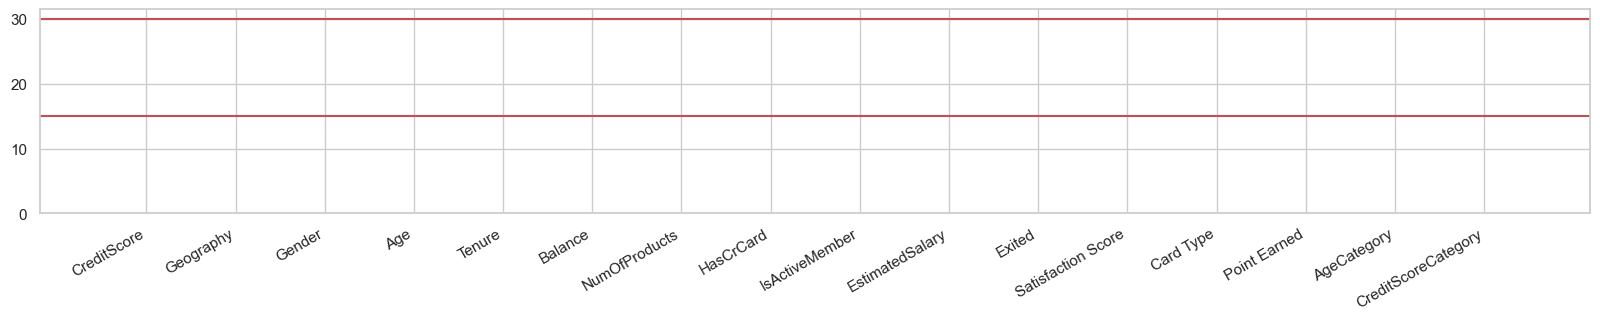

In [55]:
# Visualisation du pourcentage de manquants par variable

fig=plt.figure(figsize=(20,3))
plt.bar(x=prct_manquants.sort_values().index, height=prct_manquants.sort_values().values)
plt.axhline(y=15, color='r',linestyle='-') #Ligne à 15%
plt.axhline(y=30, color='r',linestyle='-') #Ligne à 30%
plt.xticks(rotation=90)

fig.autofmt_xdate()

<Axes: >

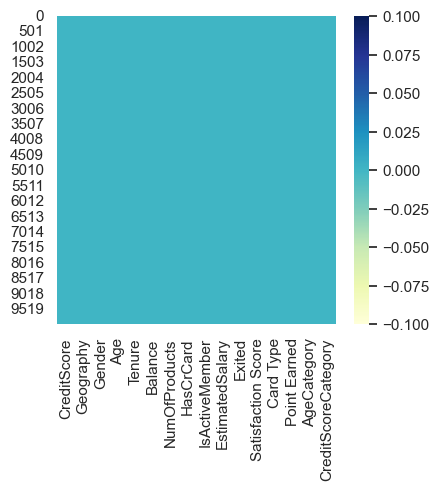

In [56]:
plt.figure(figsize=(4.5,4))
sns.heatmap(customer_df.isna(),cmap="YlGnBu")

Détection des outliers

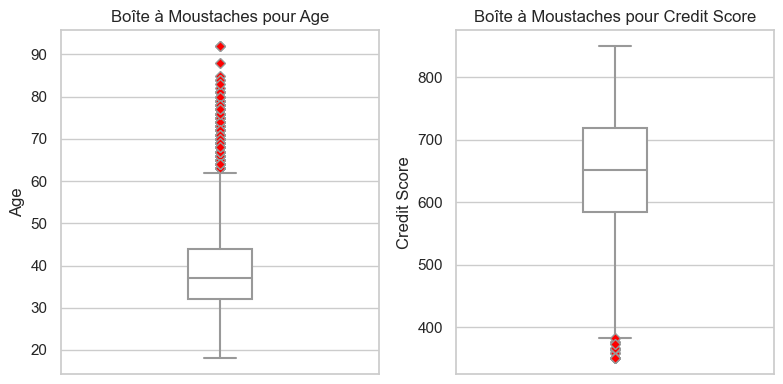

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(data=customer_df, y='Age', ax=axes[0],color='white',width=0.2,flierprops=dict(markerfacecolor='red', marker='D'))
axes[0].set_title('Boîte à Moustaches pour Age')
axes[0].set_ylabel('Age')

sns.boxplot(data=customer_df, y='CreditScore', ax=axes[1],color='white',width=0.2,flierprops=dict(markerfacecolor='red', marker='D'))
axes[1].set_title('Boîte à Moustaches pour Credit Score')
axes[1].set_ylabel('Credit Score')

plt.tight_layout()
plt.show()

In [58]:
customer_num

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Complain  Satisfaction Score  \
0                  1        101348.88       1         1                   2   
1                  1        112542.58       0         1                   3   
2                  0        113931.57       1         1                   3   
3                  0         93826.63       0         0                   5   
4                  1         79084.10       0         0                   5   
...              ...              ...     ...       ...                 ...   
9995               0         96270.64       0         0                   1   
9996               1        101699.77       0         0                   5   
9997               1         42085.58       1         1                   3   
9998               0         92888.52       1         1                   2   
9999               0         38190.78       0         0                   3   

      Point Earned  Taux de Résiliation  
0              464            28.116214  
1              456            27.304348  
2              377            28.116214  
3              350             9.562960  
4              425            27.304348  
...            ...                  ...  
9995           300             9.562960  
9996           771             9.562960  
9997           564             9.562960  
9998           339            48.820059  
9999           911             4.913295  

[10000 rows x 13 columns]

In [59]:
customer_num.drop(columns=['Complain','Taux de Résiliation'],inplace=True)

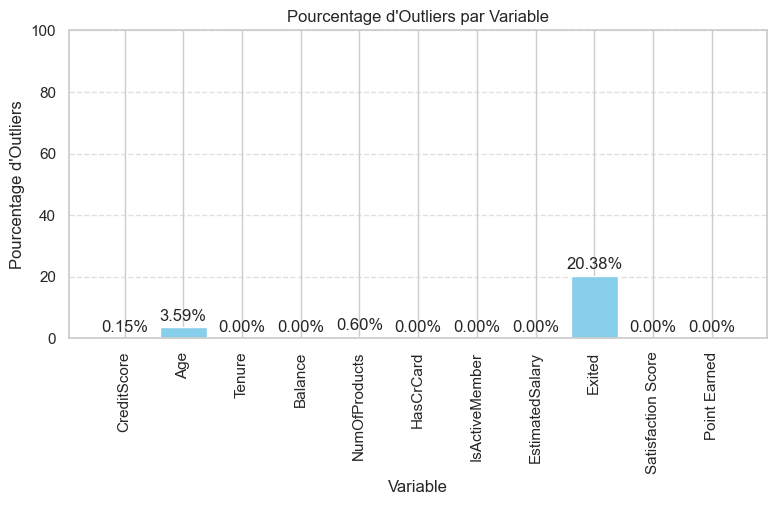

In [60]:
variables = customer_num.columns
percentage_outliers = []

for variable in variables:
    q1 = customer_df[variable].quantile(0.25)
    q3 = customer_df[variable].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = customer_df[(customer_df[variable] < lower_bound) | (customer_df[variable] > upper_bound)]

    percentage = (len(outliers) / len(customer_df)) * 100
    percentage_outliers.append(percentage)

plt.figure(figsize=(9, 4))
plt.bar(variables, percentage_outliers, color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Pourcentage d\'Outliers')
plt.title('Pourcentage d\'Outliers par Variable')
plt.ylim(0, 100)

for i, percentage in enumerate(percentage_outliers):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=90)
plt.show()


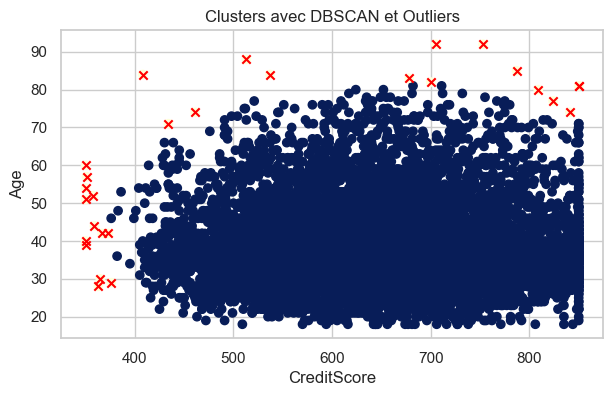

Pourcentage d'Outliers : 0.28%


In [61]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances


X = customer_df[['CreditScore', 'Age']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps = 0.3
min_samples = 5 
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)  

outliers = X[labels == -1]

percentage_outliers = len(outliers) / len(X) * 100
plt.figure(figsize=(7, 4))
plt.scatter(X['CreditScore'], X['Age'], c=labels,cmap='YlGnBu',label='Clusters')
plt.scatter(outliers['CreditScore'], outliers['Age'], color='red', marker='x', label='Outliers')
plt.xlabel('CreditScore')
plt.ylabel('Age')
plt.title('Clusters avec DBSCAN et Outliers')
plt.show()

print(f"Pourcentage d'Outliers : {percentage_outliers:.2f}%")

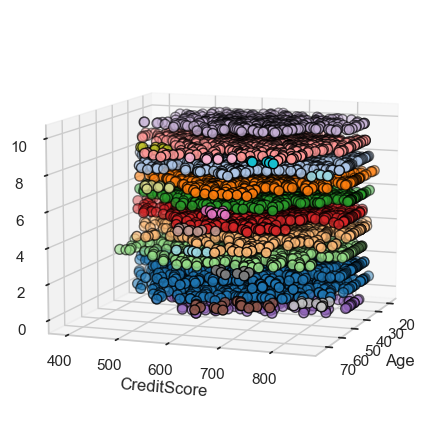

		Pourcentage d'Outliers : 3.92%


In [62]:
from mpl_toolkits.mplot3d import Axes3D

X_1= customer_df[['Age', 'CreditScore', 'Tenure']]

scaler = StandardScaler()
X_scaled_1= scaler.fit_transform(X_1)

eps = 0.34
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_1= dbscan.fit_predict(X_scaled_1)

clustered_data = X_1[labels_1!= -1]

outliers = X_1[labels_1 == -1]

percentage_outliers = (len(outliers) / len(X_1)) * 100

num_clusters = len(set(labels_1)) - (1 if -1 in labels_1 else 0)


fig = plt.figure(figsize=(9,5.5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clustered_data['Age'], clustered_data['CreditScore'], clustered_data['Tenure'], 
           c=labels_1[labels_1!= -1], s=50, label='Clusters',edgecolors='black',cmap='tab20')

#ax.scatter(outliers['Age'], outliers['CreditScore'], outliers['Tenure'], color='red', marker='x', s=100, label='Outliers')

ax.set_xlabel('Age')
ax.set_ylabel('CreditScore')
ax.set_zlabel('Tenure')
#ax.set_title('Clusters avec DBSCAN en 3D')

ax.view_init(elev=10, azim=20)

plt.show()
print(f"\t\tPourcentage d'Outliers : {percentage_outliers:.2f}%")


In [63]:
print(X_scaled_1)

[[ 0.29351742 -0.32622142 -1.04175968]
 [ 0.19816383 -0.44003595 -1.38753759]
 [ 0.29351742 -1.53679418  1.03290776]
 ...
 [-0.27860412  0.60498839  0.68712986]
 [ 0.29351742  1.25683526 -0.69598177]
 [-1.04143285  1.46377078 -0.35020386]]


In [64]:
print(labels_1)

[0 1 2 ... 3 6 4]


In [65]:
labels_true=customer_df['Tenure']
tab=pd.crosstab(labels_true,labels_1)
tab

col_0   -1     0    1    2    3    4    5    6    7    8   ...   13   14   15  \
Tenure                                                     ...                  
0        45     0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        21     0  984    0    0    0    0    0    0    0  ...    0    0    0   
2        33  1015    0    0    0    0    0    0    0    0  ...    0    0    0   
3        26     0    0    0    0    0    0  975    0    0  ...    0    0    0   
4        29     0    0    0    0  955    0    0    0    0  ...    0    0    0   
5        43     0    0    0    0    0    0    0  960    0  ...    9    0    0   
6        51     0    0    0    0    0  908    0    0    0  ...    0    8    0   
7        32     0    0    0  987    0    0    0    0    0  ...    0    0    0   
8        31     0    0  989    0    0    0    0    0    0  ...    0    0    0   
9        27     0    0    0    0    0    0    0    0  935  ...    0    0    9   
10       54     0    0    0    0    0    0    0    0    0  ...    0    0    0   

col_0    16   17   18   19   20   21   22  
Tenure                                     
0         0    0    0    0    0    0    0  
1         0    9    0    0    0    0    0  
2         0    0    0    0    0    0    0  
3         8    0    0    0    0    0    0  
4         0    0    0    0    0    0    5  
5         0    0    0    0    0    0    0  
6         0    0    0    0    0    0    0  
7         0    0    0    9    0    0    0  
8         0    0    0    0    0    5    0  
9         0    0    7    0    6    0    0  
10        0    0    0    0    0    0    0  

[11 rows x 24 columns]

In [66]:
print(customer_df[customer_df['Tenure']==0].value_counts())

CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  Satisfaction Score  Card Type  Point Earned  AgeCategory  CreditScoreCategory
350          France     Female  40   0       111098.85  1              1          1               172321.21        1       2                   DIAMOND    670           31-40        Très Faible            1
688          Spain      Male    36   0       89772.30   1              1          0               177383.68        1       5                   DIAMOND    663           31-40        Élevé                  1
695          Spain      Male    28   0       96020.86   1              1          1               57992.49         0       2                   SILVER     865           18-30        Élevé                  1
             France     Female  42   0       0.00       2              0          1               140724.64        0       1                   PLATINUM   875           41-50        

In [67]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score,rand_score
from scipy.stats.contingency import association

# Évaluation avec l'indice de Rand
rand_score = adjusted_rand_score(labels_true, labels_1)

# Évaluation avec l'information mutuelle
mutual_info = adjusted_mutual_info_score(labels_true, labels_1)

# Évaluation avec V-Cramer
v_cramer_score=association(tab,method='cramer')

print(f'Indice de Rand : {rand_score:.2f}')
print(f'Information Mutuelle : {mutual_info:.2f}')
print(f'V de Cramer : {v_cramer_score:.2f}')


Indice de Rand : 0.94
Information Mutuelle : 0.94
V de Cramer : 0.98


In [68]:
#Indices internes

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

L=[(labels,' DBSCAN 2D',X_scaled),(labels_1,'DBSCAN 3D',X_scaled_1)]
for lab in L:
    #Indice de Davies-Bouldin
    db_score = davies_bouldin_score(lab[2], lab[0])
    
    #Indice de Calinski-Harabasz 
    ch_score = calinski_harabasz_score(lab[2], lab[0])
    
    #Silhouette Score
    silhouette_avg = silhouette_score(lab[2], lab[0])

    
    print(lab[1],f'\nIndice de Davies-Bouldin:{db_score:.2f}\n Indice de Calinski-Harabasv:{ch_score:.2f}\n Silhouette Score:{silhouette_avg:.2f}')
    print('\t')
    


 DBSCAN 2D 
Indice de Davies-Bouldin:1.46
 Indice de Calinski-Harabasv:104.46
 Silhouette Score:0.55
	
DBSCAN 3D 
Indice de Davies-Bouldin:4.03
 Indice de Calinski-Harabasv:288.77
 Silhouette Score:-0.05
	


Discrétisation des variables 

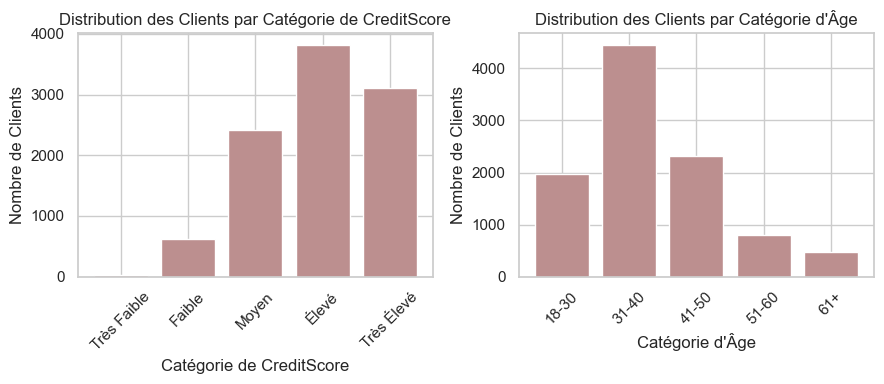

In [69]:
plt.figure(figsize=(9, 4))

#Plot 1 
plt.subplot(1,2,1)
creditscore_category_counts = customer_df['CreditScoreCategory'].value_counts()
creditscore_category_counts = creditscore_category_counts.sort_index()
plt.bar(creditscore_category_counts.index, creditscore_category_counts.values, color='rosybrown')
plt.xlabel('Catégorie de CreditScore')
plt.ylabel('Nombre de Clients')
plt.title('Distribution des Clients par Catégorie de CreditScore')
plt.xticks(rotation=45) 

#Plot 2 
plt.subplot(1,2,2)
age_category_counts = customer_df['AgeCategory'].value_counts()
age_category_counts = age_category_counts.sort_index()
plt.bar(age_category_counts.index, age_category_counts.values, color='rosybrown')
plt.xlabel('Catégorie d\'Âge')
plt.ylabel('Nombre de Clients')
plt.title('Distribution des Clients par Catégorie d\'Âge')
plt.xticks(rotation=45) 

plt.tight_layout()

plt.show()

Encodage des variables

In [70]:
customer_df_num=customer_df.copy()

In [71]:
#Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
customer_df_num['AgeCategory_Encoded'] = encoder.fit_transform(customer_df_num[['AgeCategory']])

customer_df_num['CreditScore_Encoded']=encoder.fit_transform(customer_df_num[['CreditScoreCategory']])

In [72]:
selected_columns = customer_df_num[['AgeCategory', 'AgeCategory_Encoded','CreditScoreCategory','CreditScore_Encoded']]
selected_columns

AgeCategory  AgeCategory_Encoded CreditScoreCategory  CreditScore_Encoded
0          41-50                  2.0               Élevé                  4.0
1          41-50                  2.0               Élevé                  4.0
2          41-50                  2.0               Moyen                  1.0
3          31-40                  1.0               Élevé                  4.0
4          41-50                  2.0          Très Élevé                  3.0
...          ...                  ...                 ...                  ...
9995       31-40                  1.0          Très Élevé                  3.0
9996       31-40                  1.0               Moyen                  1.0
9997       31-40                  1.0          Très Élevé                  3.0
9998       41-50                  2.0          Très Élevé                  3.0
9999       18-30                  0.0          Très Élevé                  3.0

[10000 rows x 4 columns]

In [73]:
customer_df_num.drop(columns=['AgeCategory','CreditScoreCategory'],inplace=True)

In [74]:
#Dummy encoder
columns_to_encode = ['Card Type', 'Gender', 'Geography']
customer_df_num=pd.get_dummies(customer_df_num, columns=columns_to_encode,drop_first=True)

In [75]:
customer_df_num

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Satisfaction Score  \
0                  1        101348.88       1                   2   
1                  1        112542.58       0                   3   
2                  0        113931.57       1                   3   
3                  0         93826.63       0                   5   
4                  1         79084.10       0                   5   
...              ...              ...     ...                 ...   
9995               0         96270.64       0                   1   
9996               1        101699.77       0                   5   
9997               1         42085.58       1                   3   
9998               0         92888.52       1                   2   
9999               0         38190.78       0                   3   

      Point Earned  AgeCategory_Encoded  CreditScore_Encoded  Card Type_GOLD  \
0              464                  2.0                  4.0               0   
1              456                  2.0                  4.0               0   
2              377                  2.0                  1.0               0   
3              350                  1.0                  4.0               1   
4              425                  2.0                  3.0               1   
...            ...                  ...                  ...             ...   
9995           300                  1.0                  3.0               0   
9996           771                  1.0                  1.0               0   
9997           564                  1.0                  3.0               0   
9998           339                  2.0                  3.0               1   
9999           911                  0.0                  3.0               0   

      Card Type_PLATINUM  Card Type_SILVER  Gender_Male  Geography_Germany  \
0                      0                 0            0                  0   
1                      0                 0            0                  0   
2                      0                 0            0                  0   
3                      0                 0            0                  0   
4                      0                 0            0                  0   
...                  ...               ...          ...                ...   
9995                   0                 0            1                  0   
9996                   1                 0            1                  0   
9997                   0                 1            0                  0   
9998                   0                 0            1                  1   
9999                   0                 0            0                  0   

      Geography_Spain  
0                   0  
1                   1  
2                   0  
3                   0  
4                   1  
...               ...  
9995                0  
9996                0  
9997                0  
9998                0  
9999                0  

[10000 rows x 19 columns]

In [76]:
from sklearn.preprocessing import OneHotEncoder

customer_df_copy2=customer_df.copy()
columns_to_encode = ['Card Type', 'Gender', 'Geography']

encoder = OneHotEncoder(sparse_output=False)

encoder.fit(customer_df_copy2[columns_to_encode])

encoded_data = encoder.transform(customer_df_copy2[columns_to_encode])

column_names = encoder.get_feature_names_out(input_features=columns_to_encode)

encoded_df = pd.DataFrame(encoded_data, columns=column_names)

customer_df_copy2= pd.concat([customer_df_copy2, encoded_df], axis=1)

In [77]:
customer_df_copy2

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  ...  CreditScoreCategory  \
0             1               1        101348.88  ...                Élevé   
1             0               1        112542.58  ...                Élevé   
2             1               0        113931.57  ...                Moyen   
3             0               0         93826.63  ...                Élevé   
4             1               1         79084.10  ...           Très Élevé   
...         ...             ...              ...  ...                  ...   
9995          1               0         96270.64  ...           Très Élevé   
9996          1               1        101699.77  ...                Moyen   
9997          0               1         42085.58  ...           Très Élevé   
9998          1               0         92888.52  ...           Très Élevé   
9999          1               0         38190.78  ...           Très Élevé   

      Card Type_DIAMOND Card Type_GOLD  Card Type_PLATINUM Card Type_SILVER  \
0                   1.0            0.0                 0.0              0.0   
1                   1.0            0.0                 0.0              0.0   
2                   1.0            0.0                 0.0              0.0   
3                   0.0            1.0                 0.0              0.0   
4                   0.0            1.0                 0.0              0.0   
...                 ...            ...                 ...              ...   
9995                1.0            0.0                 0.0              0.0   
9996                0.0            0.0                 1.0              0.0   
9997                0.0            0.0                 0.0              1.0   
9998                0.0            1.0                 0.0              0.0   
9999                1.0            0.0                 0.0              0.0   

     Gender_Female  Gender_Male  Geography_France  Geography_Germany  \
0              1.0          0.0               1.0                0.0   
1              1.0          0.0               0.0                0.0   
2              1.0          0.0               1.0                0.0   
3              1.0          0.0               1.0                0.0   
4              1.0          0.0               0.0                0.0   
...            ...          ...               ...                ...   
9995           0.0          1.0               1.0                0.0   
9996           0.0          1.0               1.0                0.0   
9997           1.0          0.0               1.0                0.0   
9998           0.0          1.0               0.0                1.0   
9999           1.0          0.0               1.0                0.0   

      Geography_Spain  
0                 0.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 1.0  
...               ...  
9995              0.0  
9996              0.0  
9997              0.0  
9998              0.0  
9999              0.0  

[10000 rows x 25 columns]

In [78]:
csv_file_path = "D:\DataSet_Stage.csv"

customer_df_num.to_csv(csv_file_path, index=False)

Réduction de dimension

In [79]:
from sklearn.decomposition import PCA

pca = PCA()
customer_pca = pca.fit_transform(customer_df_num)

In [80]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(19)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0       Dim1        3.897013e+09                  54.0                   54.0
1       Dim2        3.303880e+09                  46.0                  100.0
2       Dim3        5.103099e+04                   0.0                  100.0
3       Dim4        9.342168e+03                   0.0                  100.0
4       Dim5        1.108736e+02                   0.0                  100.0
5       Dim6        8.361978e+00                   0.0                  100.0
6       Dim7        1.975795e+00                   0.0                  100.0
7       Dim8        1.137129e+00                   0.0                  100.0
8       Dim9        3.157765e-01                   0.0                  100.0
9      Dim10        2.714638e-01                   0.0                  100.0
10     Dim11        2.518949e-01                   0.0                  100.0
11     Dim12        2.494162e-01                   0.0                  100.0
12     Dim13        2.386917e-01                   0.0                  100.0
13     Dim14        2.177307e-01                   0.0                  100.0
14     Dim15        2.055543e-01                   0.0                  100.0
15     Dim16        1.370423e-01                   0.0                  100.0
16     Dim17        1.093962e-01                   0.0                  100.0
17     Dim18        9.155663e-02                   0.0                  100.0
18     Dim19        6.242580e-02                   0.0                  100.0

In [81]:
pca_components=pca.components_
columns=customer_df_num.columns
variables={}
for i,component in enumerate(pca_components):
    indices_sort=np.argsort(component)[::-1]
    variables_sort=columns[indices_sort]
    variables[f'Composante principale{i+1}']=variables_sort
df=pd.DataFrame(variables).T
df

0                    1   \
Composante principale1               Balance      EstimatedSalary   
Composante principale2               Balance         Point Earned   
Composante principale3                Tenure   Satisfaction Score   
Composante principale4                   Age   Satisfaction Score   
Composante principale5                   Age  AgeCategory_Encoded   
Composante principale6                Tenure   Satisfaction Score   
Composante principale7         NumOfProducts               Tenure   
Composante principale8   CreditScore_Encoded       IsActiveMember   
Composante principale9         NumOfProducts    Geography_Germany   
Composante principale10               Exited    Geography_Germany   
Composante principale11       Card Type_GOLD          Gender_Male   
Composante principale12   Card Type_PLATINUM      Geography_Spain   
Composante principale13       IsActiveMember       Card Type_GOLD   
Composante principale14      Geography_Spain        NumOfProducts   
Composante principale15    Geography_Germany          Gender_Male   
Composante principale16               Exited      Geography_Spain   
Composante principale17               Exited  AgeCategory_Encoded   
Composante principale18               Exited                  Age   
Composante principale19  AgeCategory_Encoded       IsActiveMember   

                                         2                    3   \
Composante principale1         Point Earned          CreditScore   
Composante principale2          CreditScore                  Age   
Composante principale3              Balance          Gender_Male   
Composante principale4               Exited  AgeCategory_Encoded   
Composante principale5               Exited       IsActiveMember   
Composante principale6            HasCrCard                  Age   
Composante principale7               Exited     Card Type_SILVER   
Composante principale8      Geography_Spain   Card Type_PLATINUM   
Composante principale9   Card Type_PLATINUM               Exited   
Composante principale10    Card Type_SILVER   Card Type_PLATINUM   
Composante principale11   Geography_Germany               Exited   
Composante principale12      IsActiveMember               Tenure   
Composante principale13   Geography_Germany               Tenure   
Composante principale14      Card Type_GOLD     Card Type_SILVER   
Composante principale15              Exited     Card Type_SILVER   
Composante principale16   Geography_Germany       IsActiveMember   
Composante principale17      IsActiveMember        NumOfProducts   
Composante principale18      IsActiveMember          Gender_Male   
Composante principale19       NumOfProducts          Gender_Male   

                                          4                    5   \
Composante principale1                   Age    Geography_Germany   
Composante principale2    Satisfaction Score  AgeCategory_Encoded   
Composante principale3         NumOfProducts            HasCrCard   
Composante principale4    Card Type_PLATINUM            HasCrCard   
Composante principale5     Geography_Germany  CreditScore_Encoded   
Composante principale6   CreditScore_Encoded          Gender_Male   
Composante principale7     Geography_Germany   Card Type_PLATINUM   
Composante principale8         NumOfProducts            HasCrCard   
Composante principale9             HasCrCard   Satisfaction Score   
Composante principale10            HasCrCard  AgeCategory_Encoded   
Composante principale11        NumOfProducts  CreditScore_Encoded   
Composante principale12                  Age          CreditScore   
Composante principale13      EstimatedSalary              Balance   
Composante principale14  AgeCategory_Encoded   Satisfaction Score   
Composante principale15   Card Type_PLATINUM       IsActiveMember   
Composante principale16  AgeCategory_Encoded          Gender_Male   
Composante principale17          Gender_Male       Card Type_GOLD   
Composante principale18        NumOfProducts   Satisfactio

In [82]:
explained_variance_ratio = pca.explained_variance_ratio_

# Les deux premières composantes principales
explained_variance_ratio_for_first_two_components = explained_variance_ratio[:2]

# Affichez le pourcentage d'informations expliquées pour les deux premières composantes
print("Pourcentage d'informations expliquées par chaque composante principale :")
for i, ratio in enumerate(explained_variance_ratio_for_first_two_components):
    print(f"\tComposante Principale {i + 1}: {ratio:.2%}")


Pourcentage d'informations expliquées par chaque composante principale :
	Composante Principale 1: 54.12%
	Composante Principale 2: 45.88%


In [83]:
explained_variance = pca.explained_variance_
components = pca.components_

# Affichez les composantes principales et leurs valeurs propres
for i, component in enumerate(components):
    print(f"Composante Principale {i + 1}:")
    print("\tVecteur Propre (Composante Principale) : \n", component)
    print("\tValeur Propre : ", explained_variance[i])
    print("\n")

Composante Principale 1:
	Vecteur Propre (Composante Principale) : 
 [ 9.51816562e-06  4.65281362e-06 -5.39944379e-07  9.96979871e-01
 -2.81486669e-06 -1.13309097e-07 -8.69970409e-08  7.76603696e-02
  7.68294720e-07 -8.02340872e-08  5.22919054e-05  5.27138082e-07
  1.40550268e-07  1.57069004e-08 -5.01002829e-08 -1.26751744e-07
  9.14419101e-08  2.78116284e-06 -9.32788088e-07]
	Valeur Propre :  3897013457.1093616


Composante Principale 2:
	Vecteur Propre (Composante Principale) : 
 [ 3.21058035e-06  1.74611085e-06 -4.42665744e-07  7.76603691e-02
 -4.02880584e-07  6.86475476e-08  9.16735311e-08 -9.96979873e-01
 -1.72555426e-08  3.30065207e-07  1.07791805e-05  1.95597967e-07
 -1.17353602e-07 -3.35559465e-08 -1.27319458e-08 -8.76028846e-08
  7.89282260e-08  1.77587442e-07 -3.68449116e-08]
	Valeur Propre :  3303879514.6084747


Composante Principale 3:
	Vecteur Propre (Composante Principale) : 
 [ 9.10808872e-06 -8.35739246e-05  1.28107757e-04  5.29715940e-05
  2.79549193e-05  2.18765432e-

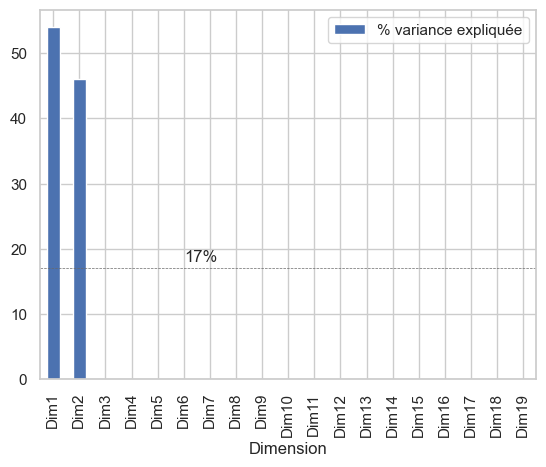

In [84]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") 
plt.text(5, 18, "17%") 
plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") 
plt.show()

In [85]:
# Transformation en DataFrame pandas
customer_pca_df = pd.DataFrame({
    "Dim1" : customer_pca[:,0], 
    "Dim2" : customer_pca[:,1],
    "Geography" : customer_df["Geography"],
})

# Résultat (premières lignes)
customer_pca_df.head()

Dim1          Dim2 Geography
0 -76157.153349  -7194.762893    France
1   8266.902493 -11846.107274     Spain
2  83998.621198  -7340.136221    France
3 -76741.339282    304.767979    France
4  47245.516960  24749.991578     Spain

In [86]:
n = customer_df_num.shape[0] # nb individus
p = customer_df_num.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': customer_df_num.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

id         COR_1         COR_2
0           CreditScore      0.594152      0.184533
1                   Age      0.290442      0.100360
2                Tenure     -0.033705     -0.025443
3               Balance  62234.417234   4463.646933
4         NumOfProducts     -0.175712     -0.023156
5             HasCrCard     -0.007073      0.003946
6        IsActiveMember     -0.005431      0.005269
7       EstimatedSalary   4847.788792 -57302.922982
8                Exited      0.047959     -0.000992
9    Satisfaction Score     -0.005008      0.018971
10         Point Earned      3.264215      0.619550
11  AgeCategory_Encoded      0.032906      0.011242
12  CreditScore_Encoded      0.008774     -0.006745
13       Card Type_GOLD      0.000980     -0.001929
14   Card Type_PLATINUM     -0.003127     -0.000732
15     Card Type_SILVER     -0.007912     -0.005035
16          Gender_Male      0.005708      0.004537
17    Geography_Germany      0.173608      0.010207
18      Geography_Spain     -0.058227     -0.002118

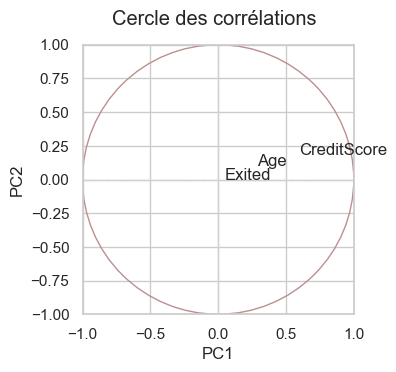

In [87]:
fig, axes = plt.subplots(figsize = (3.5,3.5))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline( 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline( 0, color = 'lightgray', linestyle = '--', linewidth = 1)
plt.xlabel('PC1')
plt.ylabel('PC2')

for j in range(p):
    if(j==8 or j==0 or j==1):
        axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
plt.gca().add_artist(plt.Circle((0,0),1,color='rosybrown',fill=False))
plt.show()

In [88]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (customer_pca**2) / (customer_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(19)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

      PC1_contrib   PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
0        0.014883  1.566783e-04     0.003756     0.001014     0.001115   
1        0.000175  4.247439e-04     0.004457     0.001939     0.000406   
2        0.018106  1.630737e-04     0.010714     0.023866     0.000653   
3        0.015112  2.811347e-07     0.012494     0.002592     0.000019   
4        0.005728  1.854069e-03     0.006653     0.042361     0.001422   
...           ...           ...          ...          ...          ...   
9995     0.015038  1.375605e-05     0.017930     0.015724     0.000021   
9996     0.000920  2.888554e-05     0.005368     0.019320     0.001395   
9997     0.016736  8.149589e-03     0.000296     0.003736     0.000617   
9998     0.000010  1.513096e-04     0.014021     0.015792     0.000931   
9999     0.006083  1.313641e-02     0.017781     0.021221     0.011526   

      PC6_contrib   PC7_contrib  PC8_contrib  PC9_contrib  PC10_contrib  \
0        0.011277  4.871378e-03     

In [89]:
customer_df_num['PC1'] = customer_pca[:,0]
customer_df_num['PC2'] = customer_pca[:,1]

In [90]:
customer_df_num

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Satisfaction Score  ...  \
0                  1        101348.88       1                   2  ...   
1                  1        112542.58       0                   3  ...   
2                  0        113931.57       1                   3  ...   
3                  0         93826.63       0                   5  ...   
4                  1         79084.10       0                   5  ...   
...              ...              ...     ...                 ...  ...   
9995               0         96270.64       0                   1  ...   
9996               1        101699.77       0                   5  ...   
9997               1         42085.58       1                   3  ...   
9998               0         92888.52       1                   2  ...   
9999               0         38190.78       0                   3  ...   

      AgeCategory_Encoded  CreditScore_Encoded  Card Type_GOLD  \
0                     2.0                  4.0               0   
1                     2.0                  4.0               0   
2                     2.0                  1.0               0   
3                     1.0                  4.0               1   
4                     2.0                  3.0               1   
...                   ...                  ...             ...   
9995                  1.0                  3.0               0   
9996                  1.0                  1.0               0   
9997                  1.0                  3.0               0   
9998                  2.0                  3.0               1   
9999                  0.0                  3.0               0   

      Card Type_PLATINUM  Card Type_SILVER  Gender_Male  Geography_Germany  \
0                      0                 0            0                  0   
1                      0                 0            0                  0   
2                      0                 0            0                  0   
3                      0                 0            0                  0   
4                      0                 0            0                  0   
...                  ...               ...          ...                ...   
9995                   0                 0            1                  0   
9996                   1                 0            1                  0   
9997                   0                 1            0                  0   
9998                   0                 0            1                  1   
9999                   0                 0            0                  0   

      Geography_Spain           PC1           PC2  
0                   0 -76157.153349  -7194.762893  
1                   1   8266.902493 -11846.107274  
2                   0  83998.621198  -7340.136221  
3                   0 -76741.339282    304.767979  
4                   1  47245.516960  24749.991578  
...               ...           ...           ...  
9995                0 -76551.538494  -2131.861110  
9996                0 -18933.541664  -3089.245106  
9997                0 -80759.557079  51889.555762  
9998          

In [91]:
new_customer_df=customer_df.copy()
new_customer_df['PC1'] = customer_pca[:,0]
new_customer_df['PC2'] = customer_pca[:,1]

In [92]:
new_customer_df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Satisfaction Score  \
0             1               1        101348.88       1                   2   
1             0               1        112542.58       0                   3   
2             1               0        113931.57       1                   3   
3             0               0         93826.63       0                   5   
4             1               1         79084.10       0                   5   
...         ...             ...              ...     ...                 ...   
9995          1               0         96270.64       0                   1   
9996          1               1        101699.77       0                   5   
9997          0               1         42085.58       1                   3   
9998          1               0         92888.52       1                   2   
9999          1               0         38190.78       0                   3   

     Card Type  Point Earned AgeCategory CreditScoreCategory           PC1  \
0      DIAMOND           464       41-50               Élevé -76157.153349   
1      DIAMOND           456       41-50               Élevé   8266.902493   
2      DIAMOND           377       41-50               Moyen  83998.621198   
3         GOLD           350       31-40               Élevé -76741.339282   
4         GOLD           425       41-50          Très Élevé  47245.516960   
...        ...           ...         ...                 ...           ...   
9995   DIAMOND           300       31-40          Très Élevé -76551.538494   
9996  PLATINUM           771       31-40               Moyen -18933.541664   
9997    SILVER           564       31-40          Très Élevé -80759.557079   
9998      GOLD           339       41-50          Très Élevé  -1965.620200   
9999   DIAMOND           911       18-30          Très Élevé  48687.732259   

               PC2  
0     -7194.762893  
1    -11846.107274  
2     -7340.136221  
3       304.767979  
4     24749.991578  
...            ...  
9995  -2131.861110  
9996  -3089.245106  
9997  51889.555762  
9998   7070.421176  
9999  65879.534077  

[10000 rows x 18 columns]

Division en Train et Test

In [93]:
from sklearn.model_selection import train_test_split
def division_donnée(df):
    Y=df["Exited"]
    X=df.drop(columns=["Exited"],axis=1)
    X_trn, X_tst, y_trn,y_tst=train_test_split(X,Y,
                                    test_size=0.3,random_state=42)
    return X_trn, X_tst,y_trn,y_tst

In [94]:
X_train_num,X_test_num,y_train,y_test=division_donnée(customer_df_num)
X_train,X_test,y_train,y_test=division_donnée(new_customer_df)

Mise à l'échelle

In [95]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_names=X_train_num.columns

scaler = StandardScaler()
standardized_data_train = scaler.fit_transform(X_train_num)
standardized_data_test= scaler.fit_transform(X_test_num)
X_standardized_train=pd.DataFrame(standardized_data_train,columns=features_names)
X_standardized_test=pd.DataFrame(standardized_data_test,columns=features_names)
X_standardized_train= X_standardized_train.set_index(X_train.index)



scaler = MinMaxScaler()
minmax_data_train = scaler.fit_transform(X_train_num)
minmax_data_test= scaler.fit_transform(X_test_num)
X_minmax_train=pd.DataFrame(minmax_data_train,columns=features_names)
X_minmax_test=pd.DataFrame(minmax_data_test,columns=features_names)
X_minmax_train= X_minmax_train.set_index(X_train.index)


In [96]:
from sklearn.preprocessing import Normalizer
s=Normalizer()
normalized_df=pd.DataFrame(s.fit_transform(customer_df_num),columns=customer_df_num.columns)


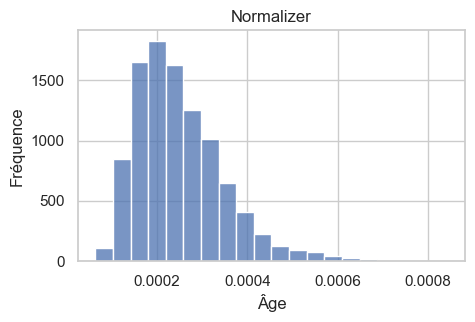

In [97]:
plt.figure(figsize=(5,3))

sns.histplot(data=normalized_df, x='Age', bins=20)  
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Normalizer')

plt.show()

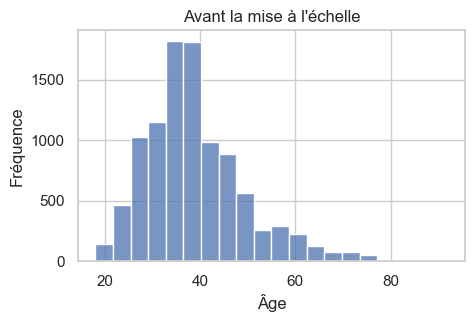

In [98]:
plt.figure(figsize=(5,3))

sns.histplot(data=customer_df, x='Age', bins=20)  
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Avant la mise à l\'échelle')

plt.show()

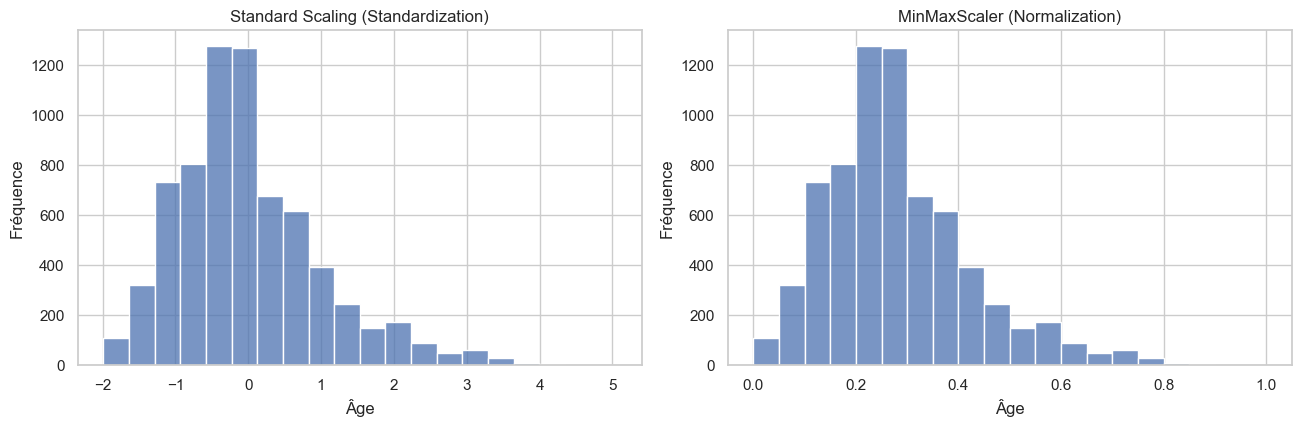

In [99]:
plt.figure(figsize=(19, 12))

# Plot 2
plt.subplot(3,3,2)
sns.histplot(data=X_standardized_train, x='Age', bins=20)  
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Standard Scaling (Standardization)')

#Plot 3

plt.subplot(3, 3, 3)
sns.histplot(data=X_minmax_train, x='Age', bins=20)  
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('MinMaxScaler (Normalization)')

plt.tight_layout()

plt.show()

Resampling

In [100]:
from sklearn.utils import resample

def resample_fonction(X_train_1,y_train_1):
    df= X_train_1.copy()
    df["Exited"]=y_train_1

    y__1 = df[df["Exited"]==1]
    y__0 = df[df["Exited"]==0]
    y__1_upsampled = resample(y__1, replace=True, random_state=42, n_samples=len(y__0))

    df_upsampled = pd.concat([y__0,y__1_upsampled])
    return df_upsampled

In [101]:
#Données numériques
X_train_concat_y_train_stand_ups=resample_fonction(X_standardized_train,y_train)
X_train_concat_y_train_minmax_ups=resample_fonction(X_minmax_train,y_train)

X_train_standard_upsampled = X_train_concat_y_train_stand_ups.drop("Exited", axis=1)
y_train_upsampled_resample= X_train_concat_y_train_stand_ups["Exited"]


X_train_minmax_upsampled = X_train_concat_y_train_stand_ups.drop("Exited", axis=1)

#Données numériques/catégorielles
X_train_concat_y_train_upsampled=resample_fonction(X_train,y_train)
X_train_upsampled_resample = X_train_concat_y_train_upsampled.drop("Exited", axis=1)

In [102]:
dossier_destination = r'D:\DataSet_upsampled'
import os
if not os.path.exists(dossier_destination):
    os.makedirs(dossier_destination)

chemin_fichier_destination = os.path.join(dossier_destination, 'DataSet_upsampled.csv')

X_train_concat_y_train_upsampled.to_csv(chemin_fichier_destination, index=False)

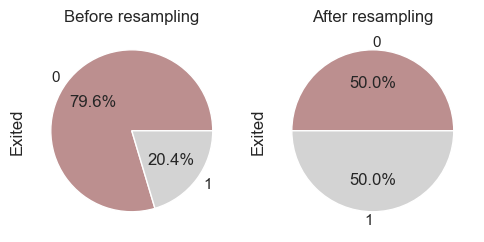

In [103]:
plt.figure(figsize=(5, 5))

# Plot 1
plt.subplot(1, 2, 1)
customer_df_num['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['rosybrown', 'lightgray'])
plt.title('Before resampling')

plt.subplot(1,2, 2)
X_train_concat_y_train_stand_ups['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['rosybrown', 'lightgray'])
plt.title('After resampling')

plt.tight_layout()

plt.show()

In [104]:
from imblearn.over_sampling import SMOTE
def SMOTE_fonction(X,y):
    
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    df_resampled['Exited'] = y_resampled  
    return df_resampled

In [105]:
#On utilise SMOTE qu'avec les données numériques
X_train_concat_standard_smote=SMOTE_fonction(X_standardized_train,y_train)

X_train_standard_smote = X_train_concat_standard_smote.drop("Exited", axis=1)
y_train_smote = X_train_concat_standard_smote["Exited"]

X_train_concat_minmax_smote=SMOTE_fonction(X_minmax_train,y_train)

X_train_minmax_smote = X_train_concat_minmax_smote.drop("Exited", axis=1)
y_train_smote = X_train_concat_minmax_smote["Exited"]

In [106]:
X_train

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9069          619     Spain  Female   32       4  175406.13              2   
2603          643   Germany  Female   34       7  160426.07              1   
7738          561    France    Male   33       6       0.00              2   
1579          618   Germany    Male   41       8   37702.79              1   
5058          714    France    Male   37       9  148466.93              2   
...           ...       ...     ...  ...     ...        ...            ...   
5734          768    France    Male   54       8   69712.74              1   
5191          682    France  Female   58       1       0.00              1   
5390          735    France  Female   38       1       0.00              3   
860           667    France    Male   43       8  190227.46              1   
7270          697   Germany    Male   51       1  147910.30              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Satisfaction Score  \
9069          1               1        172792.43                   1   
2603          0               1        188533.11                   3   
7738          0               0        173680.39                   3   
1579          1               1        195775.48                   5   
5058          0               1        151280.96                   3   
...         ...             ...              ...                 ...   
5734          1               1         69381.05                   3   
5191          1               1           706.50                   4   
5390          0               0         92220.12                   5   
860           1               0         97508.04                   3   
7270          1               1         53581.14                   4   

     Card Type  Point Earned AgeCategory CreditScoreCategory            PC1  \
9069   DIAMOND           707       31-40               Élevé  104267.572750   
2603      GOLD           806       31-40               Élevé   90555.186902   
7738   DIAMOND           220       31-40               Moyen  -70539.874906   
1579      GOLD           615       41-50               Élevé  -31235.018081   
5058    SILVER           936       31-40          Très Élevé   75739.156784   
...        ...           ...         ...                 ...            ...   
5734    SILVER           569       51-60          Très Élevé   -9137.581317   
5191  PLATINUM           709       51-60               Élevé  -83973.064296   
5390    SILVER           678       31-40          Très Élevé  -76866.083955   
860    DIAMOND           680       41-50               Élevé  113197.525971   
7270   DIAMOND           639       51-60               Élevé   67596.788127   

               PC2  
9069 -64800.436885  
2603 -81656.933872  
7738 -79307.825372  
1579 -98408.168347  
5058 -45446.039694  
...            ...  
5734  30090.438948  
5191  93143.667199  
5390   1906.429764  
860   11407.614528  
7270  51915.483112  

[7000 rows x 17 columns]

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CreditScore          7000 non-null   int64   
 1   Geography            7000 non-null   object  
 2   Gender               7000 non-null   object  
 3   Age                  7000 non-null   int64   
 4   Tenure               7000 non-null   int64   
 5   Balance              7000 non-null   float64 
 6   NumOfProducts        7000 non-null   int64   
 7   HasCrCard            7000 non-null   int64   
 8   IsActiveMember       7000 non-null   int64   
 9   EstimatedSalary      7000 non-null   float64 
 10  Satisfaction Score   7000 non-null   int64   
 11  Card Type            7000 non-null   object  
 12  Point Earned         7000 non-null   int64   
 13  AgeCategory          7000 non-null   category
 14  CreditScoreCategory  7000 non-null   category
 15  PC1               

In [108]:
from imblearn.over_sampling import SMOTENC

categorial_columns=[]
for col in X_train.columns:
    if (X_train[col].dtype.name=='category' or X_train[col].dtype.name=='object'):
        categorial_columns.append(col)

numeric_columns = [col for col in X_train.columns if col not in categorial_columns]
X_numeric= X_train[numeric_columns]
X_categorial= X_train[categorial_columns]

smote_nc = SMOTENC(random_state=42, categorical_features=[i for i in range(len(categorial_columns))])

X_train_resampled_smote, y_train_resampled_smote= smote_nc.fit_resample(pd.concat([X_categorial, X_numeric],axis=1), y_train)


In [109]:
X_train_resampled_smote

Geography  Gender Card Type AgeCategory CreditScoreCategory  \
0         Spain  Female   DIAMOND       31-40               Élevé   
1       Germany  Female      GOLD       31-40               Élevé   
2        France    Male   DIAMOND       31-40               Moyen   
3       Germany    Male      GOLD       41-50               Élevé   
4        France    Male    SILVER       31-40          Très Élevé   
...         ...     ...       ...         ...                 ...   
11087   Germany    Male    SILVER       31-40          Très Élevé   
11088    France    Male   DIAMOND       41-50               Élevé   
11089   Germany  Female   DIAMOND       51-60               Élevé   
11090    France  Female    SILVER       41-50               Moyen   
11091   Germany  Female    SILVER       41-50          Très Élevé   

       CreditScore  Age  Tenure        Balance  NumOfProducts  HasCrCard  \
0              619   32       4  175406.130000              2          1   
1              643   34       7  160426.070000              1          0   
2              561   33       6       0.000000              2          0   
3              618   41       8   37702.790000              1          1   
4              714   37       9  148466.930000              2          0   
...            ...  ...     ...            ...            ...        ...   
11087          658   43       3  113095.379502              1          0   
11088          694   28       2       0.000000              1          1   
11089          691   55       1  143666.538015              1          0   
11090          610   42       4       0.000000              3          0   
11091          723   48       5  145710.824866              1          0   

       IsActiveMember  EstimatedSalary  Satisfaction Score  Point Earned  \
0                   1    172792.430000                   1           707   
1                   1    188533.110000                   3           806   
2                   0    173680.390000                   3           220   
3                   1    195775.480000                   5           615   
4                   1    151280.960000                   3           936   
...               ...              ...                 ...           ...   
11087               0     95014.861711                   2           708   
11088               0     35329.946265                   3           454   
11089               0    106027.929175                   4           410   
11090               0    111017.905092                   4           373   
11091               0     92425.946963                   4           668   

                 PC1           PC2  
0      104267.572750 -64800.436885  
1       90555.186902 -81656.933872  
2      -70539.874906 -79307.825372  
3      -31235.018081 -98408.168347  
4       75739.156784 -45446.039694  
...              ...           ...  
11087   36104.774522   7903.157537  
11088  -81284.208000  58624.785384  
11089   67438.867905   -702.484687  
11090  -75406.258087 -16834.587299  
11091   68420.659519  13017.180745  

[11092 rows x 17 columns]

# Modélisation et évaluation

Fonction d'évaluation

In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

def evaluate_model(y_true,y_predict):
    evaluation = {}
    evaluation['Accuracy'] = accuracy_score(y_true, y_predict)
    evaluation['Precision'] = precision_score(y_true, y_predict)
    evaluation['Recall'] = recall_score(y_true, y_predict)
    evaluation['F1_Score'] = f1_score(y_true, y_predict)
    
    return evaluation

In [111]:
def print_evaluation(evaluation):
    print("Exactitude du modèle : {:.2f}%".format(evaluation['Accuracy']))
    print("Précision du modèle : {:.2f}%".format(evaluation['Precision']))
    print("Recall du modèle : {:.2f}%".format(evaluation['Recall']))
    print("F1_score du modèle : {:.2f}%".format(evaluation['F1_Score']))

In [112]:
#Un bon modèle est un modèle qui a une précision/recall élevé et F1_score moyen 

In [113]:
def result_function(data_preprocessing_methods,model):
    results={}
    for method_name, X_train_1, X_test_1, y_train_1 in data_preprocessing_methods:
        model.fit(X_train_1, y_train_1)
        y_pred = model.predict(X_test_1)
        evaluation_result = evaluate_model(y_test, y_pred)
        formatted_result = {key: round(value, 2) if isinstance(value, (int, float)) else value for key, value in evaluation_result.items()}
        results[method_name] = formatted_result
    return results

In [114]:
from sklearn.model_selection import GridSearchCV

def GridSearch(param_grid,model,X_train_1,y_train_1,scoring) :
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5,scoring=scoring)
    grid_search.fit(X_train_1, y_train_1)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print("tuned hpyerparameters (Logistic Regression): ",best_params)
    print(best_model)

Logistic Regression Function

In [115]:
from sklearn.linear_model import LogisticRegression

data_preprocessing_methods_LR = [
    ("Standard Scaling", X_standardized_train, X_standardized_test,y_train),
    ("MinMax Scaling", X_minmax_train, X_minmax_test,y_train),
    ("Standard Scaling with resampling", X_train_standard_upsampled, X_standardized_test,y_train_upsampled_resample),
    ("MinMax Scaling with resampling", X_train_minmax_upsampled, X_minmax_test,y_train_upsampled_resample),
    ("No Scaling", X_train_num, X_test_num,y_train),
    ("MinMax Scaling with SMOTE", X_train_minmax_smote, X_minmax_test,y_train_smote),
    ("Standard Scaling with SMOTE", X_train_standard_smote, X_standardized_test,y_train_smote)
]
model= LogisticRegression()

results_LR = result_function(data_preprocessing_methods_LR,model)

for method_name, _, _, _ in data_preprocessing_methods_LR:
    print(method_name)
    print(results_LR[method_name]) 
    print("\n")


Standard Scaling
{'Accuracy': 0.82, 'Precision': 0.61, 'Recall': 0.23, 'F1_Score': 0.33}


MinMax Scaling
{'Accuracy': 0.82, 'Precision': 0.6, 'Recall': 0.24, 'F1_Score': 0.34}


Standard Scaling with resampling
{'Accuracy': 0.71, 'Precision': 0.37, 'Recall': 0.7, 'F1_Score': 0.48}


MinMax Scaling with resampling
{'Accuracy': 0.81, 'Precision': 0.5, 'Recall': 0.29, 'F1_Score': 0.37}


No Scaling
{'Accuracy': 0.79, 'Precision': 0.3, 'Recall': 0.06, 'F1_Score': 0.1}


MinMax Scaling with SMOTE
{'Accuracy': 0.71, 'Precision': 0.37, 'Recall': 0.7, 'F1_Score': 0.48}


Standard Scaling with SMOTE
{'Accuracy': 0.71, 'Precision': 0.37, 'Recall': 0.7, 'F1_Score': 0.49}




In [116]:
#Le meilleur modèle est Standard Scaling with SMOTE

In [117]:
best_model_LR=LogisticRegression(C=0.01)
best_model_LR.fit(data_preprocessing_methods_LR[6][1],data_preprocessing_methods_LR[6][3] )
y_pred = best_model_LR.predict(data_preprocessing_methods_LR[6][2])
best_LR=evaluate_model(y_test, y_pred)
print_evaluation(best_LR)

Exactitude du modèle : 0.72%
Précision du modèle : 0.38%
Recall du modèle : 0.70%
F1_score du modèle : 0.49%


In [118]:
coef_df = pd.DataFrame({'Feature': data_preprocessing_methods_LR[6][1].columns, 'Coefficient': best_model_LR.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


                Feature  Coefficient
10  AgeCategory_Encoded     0.473617
1                   Age     0.382528
16    Geography_Germany     0.324148
3               Balance     0.070657
18                  PC1     0.070361
17      Geography_Spain     0.029753
11  CreditScore_Encoded     0.024465
5             HasCrCard     0.010568
19                  PC2     0.006751
7       EstimatedSalary    -0.000801
8    Satisfaction Score    -0.023398
14     Card Type_SILVER    -0.053107
2                Tenure    -0.057373
9          Point Earned    -0.062769
13   Card Type_PLATINUM    -0.063666
0           CreditScore    -0.086753
4         NumOfProducts    -0.090235
12       Card Type_GOLD    -0.121209
15          Gender_Male    -0.273675
6        IsActiveMember    -0.480530


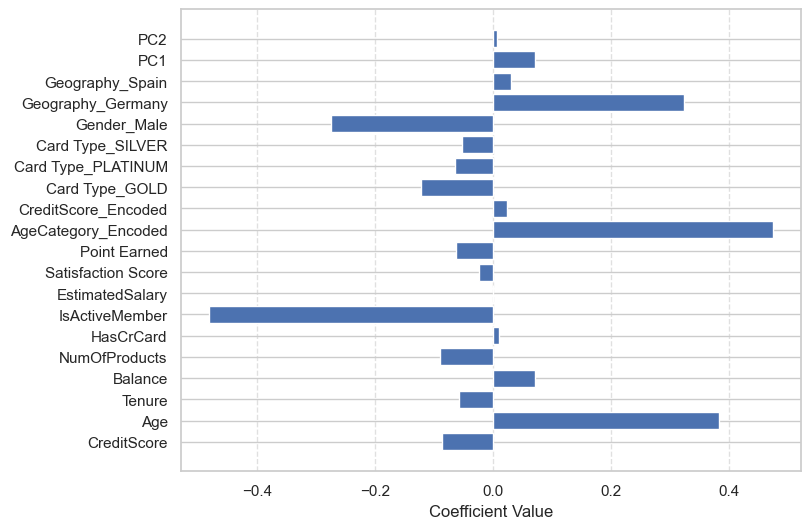

In [119]:
import matplotlib.pyplot as plt

# Récupération des coefficients du modèle
coefficients = best_model_LR.coef_[0]

# Récupération des noms de caractéristiques
feature_names = data_preprocessing_methods_LR[6][1].columns # Remplacez par les noms de vos caractéristiques

# Création d'une figure
plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefficients, color='b')
plt.xlabel('Coefficient Value')
#plt.title('Interprétation des Coefficients de la Régression Logistique')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


Naive Bayes Bernoulli

In [120]:
from sklearn.naive_bayes import BernoulliNB

model= BernoulliNB()

results_NB = result_function(data_preprocessing_methods_LR,model)

for method_name, _, _, _ in data_preprocessing_methods_LR:
    print(method_name)
    print(results_NB[method_name]) 
    print("\n")

Standard Scaling
{'Accuracy': 0.79, 'Precision': 0.45, 'Recall': 0.48, 'F1_Score': 0.47}


MinMax Scaling
{'Accuracy': 0.81, 'Precision': 0.51, 'Recall': 0.21, 'F1_Score': 0.3}


Standard Scaling with resampling
{'Accuracy': 0.73, 'Precision': 0.39, 'Recall': 0.72, 'F1_Score': 0.5}


MinMax Scaling with resampling
{'Accuracy': 0.35, 'Precision': 0.23, 'Recall': 0.97, 'F1_Score': 0.37}


No Scaling
{'Accuracy': 0.79, 'Precision': 0.44, 'Recall': 0.21, 'F1_Score': 0.29}


MinMax Scaling with SMOTE
{'Accuracy': 0.64, 'Precision': 0.3, 'Recall': 0.63, 'F1_Score': 0.4}


Standard Scaling with SMOTE
{'Accuracy': 0.73, 'Precision': 0.39, 'Recall': 0.72, 'F1_Score': 0.51}




In [121]:
#Le meilleur modèle est Standard Scaling 

In [122]:
best_model_NB=BernoulliNB(alpha=10,binarize=0.5)
best_model_NB.fit(X_standardized_train,y_train)
y_pred = best_model_NB.predict(X_standardized_test)
best_NB=evaluate_model(y_test, y_pred)
print_evaluation(best_NB)

Exactitude du modèle : 0.82%
Précision du modèle : 0.54%
Recall du modèle : 0.48%
F1_score du modèle : 0.51%


Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

results_DT= result_function(data_preprocessing_methods_LR,model)

for method_name, _, _, _ in data_preprocessing_methods_LR:
    print(method_name)
    print(results_DT[method_name]) 
    print("\n")


Standard Scaling
{'Accuracy': 0.8, 'Precision': 0.48, 'Recall': 0.49, 'F1_Score': 0.49}


MinMax Scaling
{'Accuracy': 0.78, 'Precision': 0.45, 'Recall': 0.47, 'F1_Score': 0.46}


Standard Scaling with resampling
{'Accuracy': 0.79, 'Precision': 0.47, 'Recall': 0.48, 'F1_Score': 0.48}


MinMax Scaling with resampling
{'Accuracy': 0.74, 'Precision': 0.26, 'Recall': 0.17, 'F1_Score': 0.21}


No Scaling
{'Accuracy': 0.79, 'Precision': 0.47, 'Recall': 0.49, 'F1_Score': 0.48}


MinMax Scaling with SMOTE
{'Accuracy': 0.78, 'Precision': 0.44, 'Recall': 0.53, 'F1_Score': 0.48}


Standard Scaling with SMOTE
{'Accuracy': 0.37, 'Precision': 0.21, 'Recall': 0.83, 'F1_Score': 0.34}




In [124]:
#Le meilleur modèle est le MinMax with SMOTE

In [125]:
best_model_DT=DecisionTreeClassifier(max_depth=7,min_samples_leaf=19,min_samples_split=12, splitter='best',criterion='gini')
best_model_DT.fit(X_train_minmax_smote,y_train_smote)
y_pred_DT= best_model_DT.predict(X_minmax_test)
best_DT=evaluate_model(y_test, y_pred_DT)
print_evaluation(best_DT)

Exactitude du modèle : 0.84%
Précision du modèle : 0.59%
Recall du modèle : 0.61%
F1_score du modèle : 0.60%


Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()

results_RF= result_function(data_preprocessing_methods_LR,model)

for method_name, _, _, _ in data_preprocessing_methods_LR:
    print(method_name)
    print(results_RF[method_name]) 
    print("\n")

Standard Scaling
{'Accuracy': 0.87, 'Precision': 0.79, 'Recall': 0.45, 'F1_Score': 0.58}


MinMax Scaling
{'Accuracy': 0.87, 'Precision': 0.79, 'Recall': 0.44, 'F1_Score': 0.56}


Standard Scaling with resampling
{'Accuracy': 0.87, 'Precision': 0.72, 'Recall': 0.5, 'F1_Score': 0.59}


MinMax Scaling with resampling
{'Accuracy': 0.81, 'Precision': 0.54, 'Recall': 0.01, 'F1_Score': 0.02}


No Scaling
{'Accuracy': 0.87, 'Precision': 0.79, 'Recall': 0.45, 'F1_Score': 0.57}


MinMax Scaling with SMOTE
{'Accuracy': 0.86, 'Precision': 0.7, 'Recall': 0.52, 'F1_Score': 0.59}


Standard Scaling with SMOTE
{'Accuracy': 0.47, 'Precision': 0.25, 'Recall': 0.87, 'F1_Score': 0.39}




In [127]:
#Le meilleure modèle est MinMax with SMOTE

In [128]:
best_model_RF=RandomForestClassifier(bootstrap=True,max_depth=4,min_samples_leaf=2,min_samples_split=5,n_estimators=33,max_features='sqrt')

best_model_RF.fit(X_train_minmax_smote,y_train_smote)
y_pred = best_model_RF.predict(X_minmax_test)
best_RF=evaluate_model(y_test, y_pred)
print_evaluation(best_RF)

Exactitude du modèle : 0.78%
Précision du modèle : 0.45%
Recall du modèle : 0.66%
F1_score du modèle : 0.54%


SVC

In [129]:
from sklearn.svm import SVC

model= SVC()
results_AB= result_function(data_preprocessing_methods_LR,model)

for method_name, _, _, _ in data_preprocessing_methods_LR:
    print(method_name)
    print(results_AB[method_name]) 
    print("\n")

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Standard Scaling
{'Accuracy': 0.87, 'Precision': 0.83, 'Recall': 0.4, 'F1_Score': 0.54}


MinMax Scaling
{'Accuracy': 0.85, 'Precision': 0.81, 'Recall': 0.28, 'F1_Score': 0.42}


Standard Scaling with resampling
{'Accuracy': 0.8, 'Precision': 0.5, 'Recall': 0.7, 'F1_Score': 0.58}


MinMax Scaling with resampling
{'Accuracy': 0.81, 'Precision': 1.0, 'Recall': 0.0, 'F1_Score': 0.0}


No Scaling
{'Accuracy': 0.81, 'Precision': 0.0, 'Recall': 0.0, 'F1_Score': 0.0}


MinMax Scaling with SMOTE
{'Accuracy': 0.77, 'Precision': 0.43, 'Recall': 0.61, 'F1_Score': 0.51}


Standard Scaling with SMOTE
{'Accuracy': 0.8, 'Precision': 0.5, 'Recall': 0.66, 'F1_Score': 0.57}




In [130]:
#Le meilleur modéle est Standard Scaling with resampling

In [131]:
best_model_SVC=SVC(kernel='rbf',C=0.5,gamma='auto',random_state=42)

best_model_SVC.fit(X_train_standard_upsampled,y_train_upsampled_resample)
y_pred_SVC= best_model_SVC.predict(X_standardized_test)
best_SVC=evaluate_model(y_test, y_pred_SVC)
print_evaluation(best_SVC)

Exactitude du modèle : 0.80%
Précision du modèle : 0.50%
Recall du modèle : 0.72%
F1_score du modèle : 0.59%


Extra Trees

In [132]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()

results_ET= result_function(data_preprocessing_methods_LR,model)

for method_name, _, _, _ in data_preprocessing_methods_LR:
    print(method_name)
    print(results_ET[method_name]) 
    print("\n")

Standard Scaling
{'Accuracy': 0.87, 'Precision': 0.79, 'Recall': 0.44, 'F1_Score': 0.56}


MinMax Scaling
{'Accuracy': 0.86, 'Precision': 0.77, 'Recall': 0.43, 'F1_Score': 0.55}


Standard Scaling with resampling
{'Accuracy': 0.86, 'Precision': 0.79, 'Recall': 0.41, 'F1_Score': 0.54}


MinMax Scaling with resampling
{'Accuracy': 0.81, 'Precision': 0.5, 'Recall': 0.0, 'F1_Score': 0.0}


No Scaling
{'Accuracy': 0.87, 'Precision': 0.78, 'Recall': 0.45, 'F1_Score': 0.57}


MinMax Scaling with SMOTE
{'Accuracy': 0.85, 'Precision': 0.66, 'Recall': 0.52, 'F1_Score': 0.58}


Standard Scaling with SMOTE
{'Accuracy': 0.85, 'Precision': 0.64, 'Recall': 0.55, 'F1_Score': 0.59}




In [133]:
#Le meilleur modèle est Standard Scaling with SMOTE

In [134]:
best_model_ET=ExtraTreesClassifier(bootstrap= False, max_depth= 19, max_features='log2', min_samples_leaf= 1, min_samples_split=10, n_estimators=910)

best_model_ET.fit(X_train_standard_smote,y_train_smote)
y_pred_ET= best_model_ET.predict(X_standardized_test)
best_ET=evaluate_model(y_test, y_pred_ET)
print_evaluation(best_ET)

Exactitude du modèle : 0.84%
Précision du modèle : 0.59%
Recall du modèle : 0.61%
F1_score du modèle : 0.60%


KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier()

results_KNN= result_function(data_preprocessing_methods_LR,model)

for method_name, _, _, _ in data_preprocessing_methods_LR:
    print(method_name)
    print(results_KNN[method_name]) 
    print("\n")

Standard Scaling
{'Accuracy': 0.82, 'Precision': 0.59, 'Recall': 0.28, 'F1_Score': 0.38}


MinMax Scaling
{'Accuracy': 0.8, 'Precision': 0.47, 'Recall': 0.18, 'F1_Score': 0.26}


Standard Scaling with resampling
{'Accuracy': 0.71, 'Precision': 0.35, 'Recall': 0.58, 'F1_Score': 0.43}


MinMax Scaling with resampling
{'Accuracy': 0.6, 'Precision': 0.24, 'Recall': 0.48, 'F1_Score': 0.32}


No Scaling
{'Accuracy': 0.77, 'Precision': 0.25, 'Recall': 0.09, 'F1_Score': 0.13}


MinMax Scaling with SMOTE
{'Accuracy': 0.65, 'Precision': 0.29, 'Recall': 0.57, 'F1_Score': 0.39}


Standard Scaling with SMOTE
{'Accuracy': 0.7, 'Precision': 0.34, 'Recall': 0.62, 'F1_Score': 0.44}




In [136]:
#Le meilleur Standard Scaling with resampling

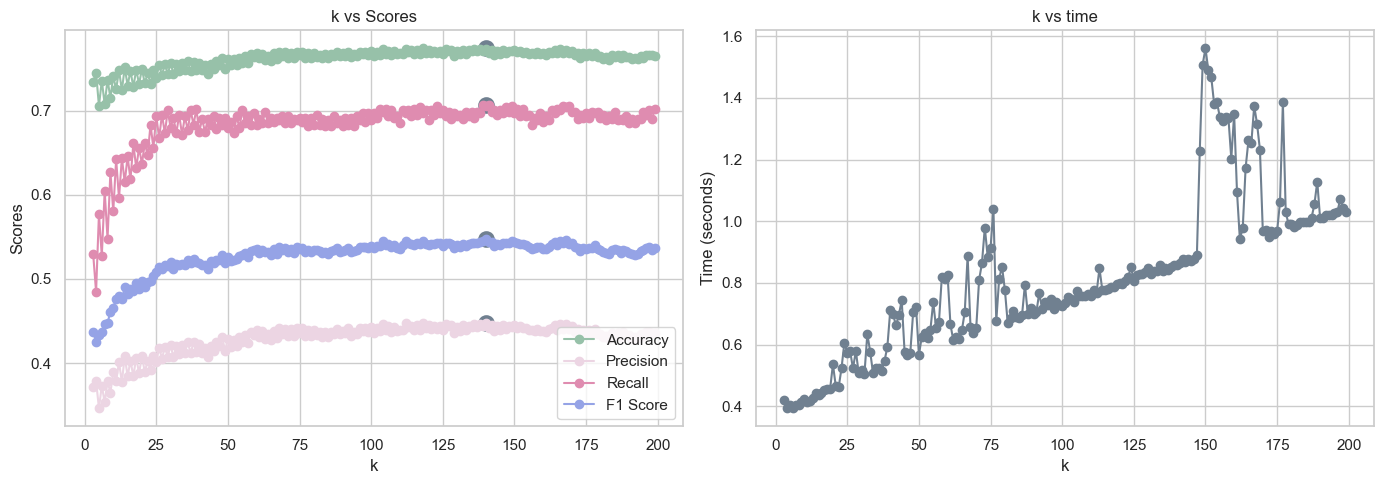

In [137]:
import time

k_max = 200
accuracies = []
precisions = []
recalls = []
f1_scores = []
times = []

best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0
best_k = 0

for k in range(3, k_max):
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(X_train_standard_upsampled.values, y_train_upsampled_resample.values)
    
    start = time.time()
    preds = clf.predict(X_standardized_test.values)
    stop = time.time()
    
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    times.append(stop - start)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
    if precision > best_precision:
        best_precision = precision
        best_k = k
    if recall > best_recall:
        best_recall = recall
        best_k = k
    if f1 > best_f1:
        best_f1 = f1
        best_k = k
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range(3, k_max), accuracies, marker='o', label='Accuracy',color='#97c1a9')
plt.plot(range(3, k_max), precisions, marker='o', label='Precision',color='#ecd5e3')
plt.plot(range(3, k_max), recalls, marker='o', label='Recall',color='#df8cb0')
plt.plot(range(3, k_max), f1_scores, marker='o', label='F1 Score',color='#95a3e6')
plt.scatter(best_k, best_accuracy, c='slategray', marker='o', s=100,linewidth=2)
plt.scatter(best_k, best_precision, c='slategray', marker='o', s=100,linewidth=2)
plt.scatter(best_k, best_recall, c='slategray', marker='o', s=100,linewidth=2)
plt.scatter(best_k, best_f1, c='slategray', marker='o', s=100,linewidth=2)
plt.xlabel('k')
plt.ylabel('Scores')
plt.title('k vs Scores')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(range(3, k_max), times, marker='o',color='slategray')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.title('k vs time')
plt.tight_layout()
plt.show()


In [138]:
best_model_KNN=KNeighborsClassifier(n_neighbors=130,metric='manhattan',weights='distance')

best_model_KNN.fit(X_train_standard_upsampled,y_train_upsampled_resample)
y_pred = best_model_KNN.predict(X_standardized_test)
best_KNN=evaluate_model(y_test, y_pred)
print_evaluation(best_KNN)

Exactitude du modèle : 0.77%
Précision du modèle : 0.45%
Recall du modèle : 0.71%
F1_score du modèle : 0.55%


In [148]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Définir la mise en page de l'application
app.layout = html.Div([
    html.H1("Performances des Algorithmes de Classification"),
    dcc.Dropdown(
        id='model-selector',
        options=[
            {'label': 'Decision Tree', 'value': 'Decision Tree'},
            {'label': 'Logistic Regression', 'value': 'Logistic Regression'},
            {'label': 'Naive Bayes', 'value': 'Naive Bayes'},
            {'label':'Random Forest','value':'Random Forest'},
            {'label': 'SVC','value':'SVC'},
            {'label':'Extra Trees','value':'Extra Trees'},
            {'label':'KNN','value':'KNN'}
        ],
        value='Decision Tree'  # Modèle par défaut
    ),
    dcc.Graph(id='performance-graph')
])

legend_colors = ['#97c1a9', '#ecd5e3', '#df8cb0', '#95a3e6']

# Définir une fonction pour mettre à jour le graphique en fonction de la sélection du modèle
@app.callback(
    Output('performance-graph', 'figure'),
    [Input('model-selector', 'value')]
)
def update_graph(selected_model):
    if(selected_model=='Logistic Regression'):
        method_names = list(results_LR.keys())
        results=results_LR
    if(selected_model=='Decision Tree'):
        method_names = list(results_DT.keys())
        results=results_DT
    if(selected_model=='NB'):
        method_names = list(results_NB.keys())
        results=results_NB
    if(selected_model=='Random Forest'):
        method_names = list(results_RF.keys())
        results=results_RF
    if(selected_model=='SVC'):
        method_names = list(results_AB.keys())
        results=results_AB
    if(selected_model=='Extra Trees'):
        method_names = list(results_ET.keys())
        results=results_ET
    if(selected_model=='KNN'):
        method_names = list(results_KNN.keys())
        results=results_KNN
    data = []
    metrics = list(results_LR[method_names[0]].keys())
    for method in method_names:
        row = {'Méthode': method}
        row.update({metric: results[method][metric] for metric in metrics})
        data.append(row)
        
    fig = px.bar(data, x='Méthode', y=metrics, title='Performances des Algorithmes de Classification')
    fig.update_layout(xaxis_title='Méthode', yaxis_title='Performance')

    for i, color in enumerate(legend_colors):
        fig.data[i].marker.color = color
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [140]:
data = {
    'Modèle': ['Logistic Regression', 'Naive Bayes', 'Decision Tree','Random Forest','Extra Trees','SVC','KNN'],
    'Précision': [best_LR['Precision'],best_NB['Precision'], best_DT['Precision'],best_RF['Precision'],best_ET['Precision'],best_SVC['Precision'],best_KNN['Precision']],
    'Accuracy': [best_LR['Accuracy'],best_NB['Accuracy'], best_DT['Accuracy'],best_RF['Accuracy'],best_ET['Accuracy'],best_SVC['Accuracy'],best_KNN['Accuracy']],
    'Recall': [best_LR['Recall'],best_NB['Recall'], best_DT['Recall'],best_RF['Recall'],best_ET['Recall'],best_SVC['Recall'],best_KNN['Recall']],
    'F1_score': [best_LR['F1_Score'],best_NB['F1_Score'], best_DT['F1_Score'],best_RF['F1_Score'],best_ET['F1_Score'],best_SVC['F1_Score'],best_KNN['F1_Score']]
}
df = pd.DataFrame(data)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Comparaison des Performances des Modèles"),
    
    # Sélection du modèle
    dcc.Dropdown(
        id='modele-dropdown',
        options=[
            {'label': modele, 'value': modele} for modele in df['Modèle']
        ],
        value=df['Modèle'][0]
    ),
    
    dcc.Tabs(id="metric-tabs", value='Précision', children=[
        dcc.Tab(label='Précision', value='Précision'),
        dcc.Tab(label='Recall', value='Recall'),
        dcc.Tab(label='Accuracy', value='Accuracy'),
        dcc.Tab(label='F1 Score', value='F1_score')
    ]),
    
    dcc.Graph(id='metric-fig'),
])

# Mise à jour de la figure en fonction de la métrique sélectionnée
@app.callback(
    Output('metric-fig', 'figure'),
    [Input('modele-dropdown', 'value'),
     Input('metric-tabs', 'value')]
)
def update_graph(selected_model, selected_metric):
    # Personnalisation des couleurs pour chaque modèle
    colors = px.colors.qualitative.Plotly
    colors=['#1791a3',' #6798b0','#97C1A9','#f09f9c','#424242','#632b6c','#fcc3a3']
    color_mapping = {model: color for model, color in zip(df['Modèle'], colors)}
    
    filtered_df = df[df[selected_metric].notnull()]
    
    # Mise en évidence du modèle sélectionné
    filtered_df['Opacity'] = filtered_df['Modèle'].apply(lambda x: 1 if x == selected_model else 0.5)
    
    fig = px.bar(filtered_df, x='Modèle', y=selected_metric, title=f'Comparaison de {selected_metric}')
    
    # Réglage de l'opacité des barres
    fig.update_traces(marker_color=[color_mapping[model] for model in filtered_df['Modèle']], 
                      marker_opacity=filtered_df['Opacity'])
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True,port=8051)

La validation croisée

In [141]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_train_num=pd.DataFrame(X_train_num)

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold(5)

# Effectuer une validation croisée pour chaque modèle avec plusieurs métriques
accuracy = cross_val_score(best_model_ET, X_train_num,y_train, cv=cv, scoring='accuracy')
recall = cross_val_score(best_model_ET, X_train_num,y_train, cv=cv, scoring='recall')
precision= cross_val_score(best_model_ET, X_train_num,y_train, cv=cv, scoring='precision')
f1_score= cross_val_score(best_model_ET, X_train_num,y_train, cv=cv, scoring='f1')

# Calculer la moyenne des scores
accuracy_score = accuracy.mean()
recall_score = recall.mean()
precision_score = precision.mean()
f1_score = f1_score.mean()

print(f"Accuracy moyen : {accuracy_score}")
print(f"Recall moyen : {recall_score}")
print(f"Precision moyen : {precision_score}")
print(f"F1 moyen : {f1_score}")

Accuracy moyen : 0.8577142857142859
Recall moyen : 0.4140182486076549
Precision moyen : 0.8118611601615274
F1 moyen : 0.5473426579440268


Matrice de confusion

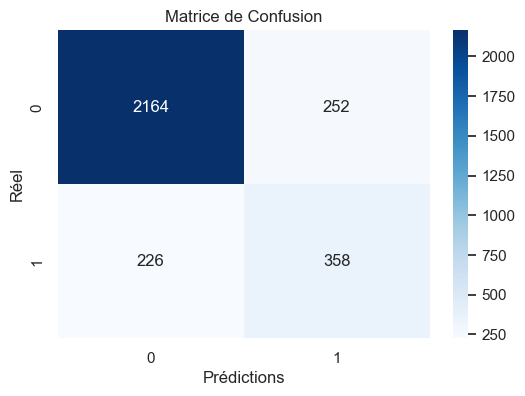

In [143]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_pred_ET)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


In [144]:
X=customer_df_num.drop(columns=["Exited"])
y=customer_df["Exited"]

Feature Importance

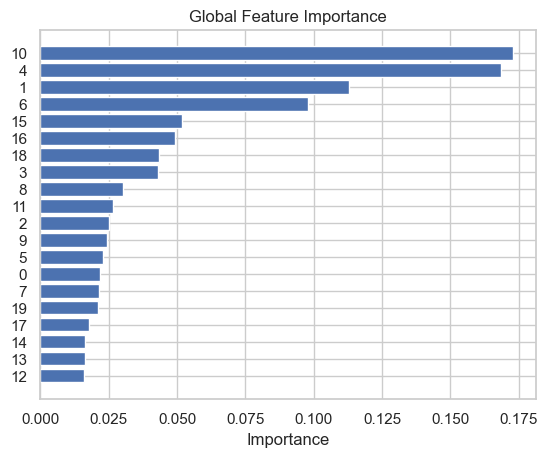

In [145]:
# Obtenir l'importance des caractéristiques
feature_importance = best_model_ET.feature_importances_

# Associer l'importance des caractéristiques aux noms des caractéristiques
feature_names = X_train_num.columns
# Trier les caractéristiques par importance (du plus important au moins important)
sorted_idx = np.argsort(feature_importance)

plt.figure()
plt.title("Global Feature Importance")
plt.barh(range(X_train_minmax_smote.shape[1]), feature_importance[sorted_idx], align="center")
plt.yticks(range(X_train_minmax_smote.shape[1]), np.array(feature_names)[sorted_idx])
plt.xlabel("Importance")
plt.show()

La courbe d'apprentissage

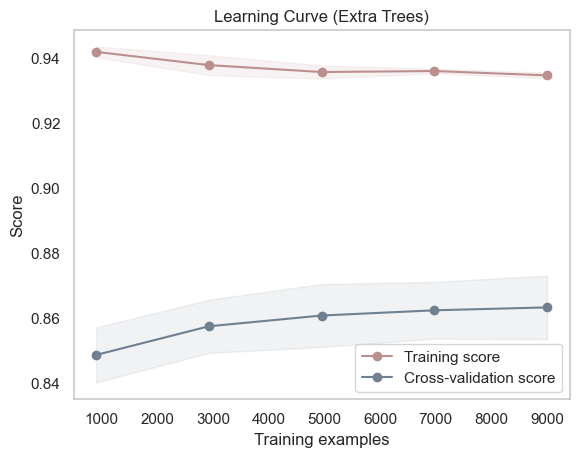

In [146]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(best_model_ET,X, y, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Extra Trees)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="rosybrown")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="slategray")
plt.plot(train_sizes, train_scores_mean, 'o-', color="rosybrown", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="slategray", label="Cross-validation score")
plt.legend(loc="best")

plt.show()

La courbe ROC

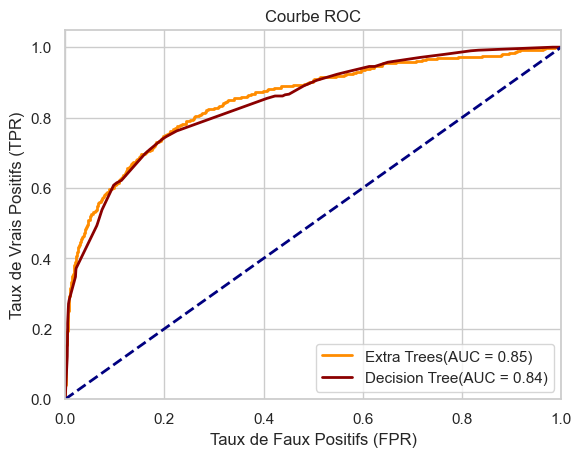

In [147]:
from sklearn.metrics import roc_curve, auc

# Obtenir les probabilités de prédiction pour la classe positive
y_scores_ET = best_model_ET.predict_proba(X_standardized_test)[:, 1]
y_scores_DT=best_model_DT.predict_proba(X_minmax_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores_ET)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_DT)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)
roc_auc_DT = auc(fpr_dt, tpr_dt)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Extra Trees(AUC = %0.2f)' % roc_auc)
plt.plot(fpr_dt, tpr_dt, color='darkred', lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_DT)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()